# Exploratory Data Analysis of the Best Books Ever using Python

![Quote](https://i.imgur.com/LryIBl3.png)


This [quote](https://www.brainyquote.com/quotes/joseph_addison_104348?img=2) from [Joseph Addison](https://www.brainyquote.com/authors/joseph-addison-quotes) nicely summarizes the power of reading. Even in, or especially in this era of smart phones and social media, it can be extra important to reserve time to focus on a particular book instead of endlessly scrolling through YouTube, Facebook, Twitter or Instagram. That said, one does not have to exclude one from the other. E-books, audio books, but also on-line platforms like [Goodreads](https://www.goodreads.com/) can bridge the gap between the classic paper book and newer technologies to absorb the content of the book or exchange experiences.

### Goodreads


[Goodreads](https://www.goodreads.com/) is an on-line platform where book lovers can keep track of the books they have read, are reading, and would like to read, as well as connect with other users in order to stay up-to-date about their reading experiences. Besides, the platform acts as a rating system for books: users can rate books on a scale from 1 to 5 stars, and optionally write a review of the book as well. In addition to this core functionality of the platform, there are many so-called ['top lists'](https://www.goodreads.com/list/), such as [Books That Should Everyone Read At Least Once](https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once) and [Best Books of the Twentieth Century](https://www.goodreads.com/list/show/6.Best_Books_of_the_20th_Century). The concept of a list is that users can vote for a certain book, which will contribute to the score for that book:

![score](https://i.imgur.com/s0HsPBi.png)


### EDA using Python

[Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) is the procedure of extracting key insights from data with the help of statistical and data visualization tools. The object-oriented programming language Python is well-suited to carry out this process, especially the libraries Pandas (data loading and manipulation), NumPy (calculations), Matplotlib (basic visualizations), Seaborn and Plotly (advanced visualizations) are valuable libraries during this process. There is a wealth of datasets available on the internet, for example the datasets on [Kaggle](https://www.kaggle.com/datasets), on which EDA can be applied. Alternatively, using techniques such as [Web Scraping](https://en.wikipedia.org/wiki/Web_scraping) users can obtain their own datasets.


### Outline
In this project I will carry out *exploratory data analysis* using Python of the largest list on the Goodreads site: the [Best Books Ever](https://www.goodreads.com/list/show/1.Best_Books_Ever) list. To this end, I will use a [dataset](https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021) available on [Kaggle](https://www.kaggle.com/) that harbors the complete list, consisting of 25 columns and 52,478 rows.

The goal of this project is to extract key insights regarding the ranking of the books on the list as well as uncover features of books that have made it to (the top of) the list.

The outline of this notebook is given below:

1. Preparations, including Downloading the dataset
2. Data Preparation and Cleaning
3. Exploratory Analysis and Visualization
4. Asking and Answering Questions
5. Inferences and Conclusion
6. Future Work and References.




## 1. Preparations

### How to Run the Code

In order to execute the code, please use the "Run" button at the top of this page and select "Run on Binder". You can edit the notebook and save a personal version to [Jovian](https://wwww.jovian.ai) by executing the cells below:

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook (uncomment following line if needed)
#jovian.commit(project='best-books-ever')

### Installation of Libraries

First, all libraries that will be used in the notebook will be installed:

In [4]:
!pip install opendatasets numpy plotly matplotlib seaborn --upgrade --quiet

### Downloading the Dataset

In order to download the [dataset](https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021) from Kaggle, I will use the [`opendatasets`](https://github.com/JovianML/opendatasets) library, since Kaggle does not offer a URL to the dataset. This library downloads the data instead by making an [API request](https://www.cloudflare.com/learning/security/api/what-is-api-call/).

I will first import the `opendatasets` library by the alias `od`:

In [5]:
import opendatasets as od

The library has now been imported. Now I will assign the [url](https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021) of the dataset to a variable:

In [6]:
dataset_url = 'https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021'

Now I run `od.download` to download the data. During this step you have to enter your Kaggle username and key. Read more about how to get this on [this page](https://github.com/JovianML/opendatasets)

In [7]:
od.download(dataset_url)

Skipping, found downloaded files in "./best-book-ever-data-for-2021" (use force=True to force download)


The data has now been downloaded. From above it can be noted the data is stored in the folder `./best-book-ever-data-for-2021` Let's navigate to that folder in the Jupyter Notebook through *File > Open* to inspect the contents:
![Jupyer file](https://i.imgur.com/wtxnThu.png)

The name of the data file is: `books_1.Best_Books_Ever.csv` Let's put the file name into a variable:

In [8]:
data_filename = './best-book-ever-data-for-2021/books_1.Best_Books_Ever.csv'

Verify that we are in the correct directory for file loading:

In [9]:
pwd

'/home/jovyan'

In [10]:
ls

best-book-ever-data-for-2021/  snoek-best-books.ipynb  work/


## 2. Data Preparation and Cleaning

Before being able to start the Exploratory Data Anaysis process, we have to load, inspect and clean the dataset.
In this section I will therefore go through the following steps:
- Loading Libraries
- Data Loading and Inspection
- Checking for Duplicate Data
- Checking for Missing Data
- Column Selection and Reordering
- Handling Incorrect and Invalid Data

### Loading Libraries

For computations, we will use [NumPy](https://numpy.org/); a powerful library that can speed up and simplify calculations in Python tremendously. This library encompasses a vast number of functions and methods to work with numerical data. I will import NumPy using the alias `np`:

In [11]:
import numpy as np

For data visualization we will use the libraries [Matplotlib](https://matplotlib.org/) as well as [Seaborn](https://seaborn.pydata.org/) (using the alias `sns`):

In [12]:
# importing the libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# ensuring the plots are displayed in the notebook and not as a pop-up
%matplotlib inline

# setting some global default parameters
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In addition I will import the more advanced visualization library [Plotly](https://plotly.com/) as `px`:

In [13]:
import plotly.express as px

### Data Loading and Inspection

In order to read, store, analyze and manipulate data, the [Pandas](https://pandas.pydata.org/) library is extremely powerful. As a convention, we will import Pandas with the alias `pd`:

In [14]:
import pandas as pd

The data from the csv file will now be loaded into a DataFrame object, a core data structure in Pandas for handling tabular data, using the `read_csv` method:

In [15]:
df_raw = pd.read_csv(data_filename)

Now that the data has been read and stored in a DataFrame, let's inspect the size of the dataset using the `shape` property:

In [16]:
df_raw.shape

(52478, 25)

The data consists of 52,478 rows and 25 columns.

### Checking for Duplicate data
Let us investigate whether the dataset contains any duplicate entry using the `duplicated()` function

In [17]:
df_raw.duplicated().sum()

50

There appear to be 50 full duplicates. In orde to display the first three duplicate occurrences the argument `keep=False` is entered as well, and I will use the `sort_values` function to sort the items by title in order to have the duplicates grouped together:

In [18]:
df_raw[df_raw.duplicated(keep=False)].sort_values(by=['title']).head(6)

bookId               title             series  \
37437  24633605-always-and-forever  Always and Forever  Serenity Point #2   
37383  24633605-always-and-forever  Always and Forever  Serenity Point #2   
37466            3973924-bal-masqu          Bal masqué                NaN   
37412            3973924-bal-masqu          Bal masqué                NaN   
37480          26845691-beatlebone          Beatlebone                NaN   
37426          26845691-beatlebone          Beatlebone                NaN   

                                             author  rating  \
37437             Harper Bentley (Goodreads Author)    3.93   
37383             Harper Bentley (Goodreads Author)    3.93   
37466  Elia Barceló, Dorotea ter Horst (Translator)    3.79   
37412  Elia Barceló, Dorotea ter Horst (Translator)    3.79   
37480                                   Kevin Barry    3.47   
37426                                   Kevin Barry    3.47   

                                             description language  \
37437  Does wanting to slap the hell out of Brody Kel...  English   
37383  Does wanting to slap the hell out of Brody Kel...  English   
37466  Parijs, 1991. Jaren nadat de Argentijnse schri...    Dutch   
37412  Parijs, 1991. Jaren nadat de Argentijnse schri...    Dutch   
37480  He will spend three days alone on his island. ...  English   
37426  He will spend three days alone on his island. ...  English   

                isbn                                             genres  \
37437  9999999999999  ['Contemporary Romance', 'Romance', 'Firefight...   
37383  9999999999999  ['Contemporary Romance', 'Romance', 'Firefight...   
37466  9789021453293                               ['Roman', 'Fiction']   
37412  9789021453293                               ['Roman', 'Fiction']   
37480  9781782116134  ['Fiction', 'Ireland', 'Irish Literature', 'Mu...   
37426  9781782116134  ['Fiction', 'Ireland', 'Irish Literature', 'Mu...   

      characters  ... firstPublishDate                       awards  \
37437         []  ...              NaN                           []   
37383         []  ...              NaN                           []   
37466         []  ...         01/01/04                           []   
37412         []  ...         01/01/04                           []   
37480         []  ...              NaN  ['Goldsmiths Prize (2015)']   
37426         []  ...              NaN  ['Goldsmiths Prize (2015)']   

      numRatings                       ratingsByStars likedPercent setting  \
37437        482    ['153', '188', '104', '26', '11']         92.0      []   
37383        482    ['153', '188', '104', '26', '11']         92.0      []   
37466        341       ['77', '146', '91', '24', '3']         92.0      []   
37412        341       ['77', '146', '91', '24', '3']         92.0      []   
37480       2528  ['471', '860', '729', '334', '134']         81.0      []   
37426       2528  ['471', '860', '729', '334', '134']         81.0      []   

                                                coverImg  bbeScore bbeVotes  \
37437  https://i.gr-assets.com/images/S/compressed.ph...        87        1   
37383  https://i.gr-assets.com/images/S/compressed.ph...        87        1   
37466  https://i.gr-assets.com/images/S/compressed.ph...        87        1   
37412  https://i.gr-assets.com/images/S/compressed.ph...        87        1   
37480  https://i.gr-assets.com/images/S/compressed.ph...        87        1   
37426  https://i.gr-assets.com/images/S/compressed.ph...        87        1   

       price  
37437    NaN  
37383    NaN  
37466    NaN  
37412    NaN  
37480   4.16  
37426   4.16  

[6 rows x 25 columns]

Now I will apply the `.drop_duplicates` method to remove the duplicates:

In [19]:
df_raw.drop_duplicates(inplace=True, ignore_index=True)

In [20]:
df_raw.shape

(52428, 25)

The dataframe has been reduced to 52,428 rows and 25 columns.

It could be that there are duplicate books that have differences in some columns, but not in all, and hence are missed. Therefore, let's check whether there are any duplicates based on both title and ISBN. ISBN stands for [International Standard Book Number](https://en.wikipedia.org/wiki/ISBN) and is unique for every book.

In [21]:
len(df_raw[df_raw.duplicated(subset=['title', 'isbn'])])

33

There appear to be 33 duplicates, let's view them:

In [22]:
df_raw[df_raw.duplicated(subset=['title', 'isbn'], keep=False)].sort_values(by=['title'])

bookId                    title              series  \
36714   19308397-betrayal                 Betrayal          Forever #9   
23403   30745337-betrayal                 Betrayal                 NaN   
16766   10915691-betrayal                 Betrayal  The Descendants #1   
26267  18006867-betrothed                Betrothed                 NaN   
19915  17975557-betrothed                Betrothed        Betrothed #1   
...                   ...                      ...                 ...   
34313      23296724-wrath                    Wrath         Forever #13   
27662             9736277  الأعمال الشعرية الكاملة                 NaN   
15465             6718801  الأعمال الشعرية الكاملة                 NaN   
25218            38649517              نهج البلاغه                 NaN   
11863           1618417._              نهج البلاغه                 NaN   

                                                  author  rating  \
36714                      Eve Newton (Goodreads Author)    4.51   
23403                      Tim Tigner (Goodreads Author)    3.91   
16766                                   Mayandree Michel    3.55   
26267                      Jill Myles (Goodreads Author)    3.61   
19915                 Wanda Wiltshire (Goodreads Author)    3.58   
...                                                  ...     ...   
34313                      Eve Newton (Goodreads Author)    4.49   
27662                                         فؤاد قاعود    4.56   
15465                       Mahmoud Darwish, محمود درويش    4.46   
25218          سید شریف رضی, سید جواد شریعت (Translator)    5.00   
11863  علي بن أبي طالب, الشريف الرضي (گردآوری), سید ج...    4.56   

                                             description language  \
36714  I had to do it. Simple as.They don't understan...  English   
23403  IT STARTED AS AN EXPERIMENT.It ended with an i...  English   
16766  Where there is love and power, there is always...  English   
26267  For years, Seri’s simple people have lived und...  English   
19915  Amy Smith has always known she was different. ...  English   
...                                                  ...      ...   
34313  The thirteenth book in the Forever Series sees...      NaN   
27662                                                NaN   Arabic   
15465  عندما تهاجر أسراب السنونو مواطنها... تسمع في ح...   Arabic   
25218                                                NaN  Persian   
11863  توضيح ناشرشك نيست كه ترجمه فنى است ظريف و دقيق...  Persian   

                isbn                                             genres  \
36714  9999999999999                                       ['Vampires']   
23403  9999999999999  ['Thriller', 'Fiction', 'Mystery', 'Suspense',...   
16766  9999999999999  ['Mythology', 'Young Adult', 'Fantasy', 'Paran...   
26267  9999999999999  ['Fantasy', 'Romance', 'Vampires', 'Paranormal...   
19915  9999999999999  ['Romance', 'Fantasy', 'Young Adult', 'Paranor...   
...              ...                                                ...   
34313  9999999999999                                                 []   
27662  9999999999999                                                 []   
15465  9999999999999             ['Poetry', 'Nonfiction', 'Literature']   
25218  9999999999999                                                 []   
11863  9999999999999  ['Religion', 'Islam', 'Nonfiction', 'Philosoph...   

                                              characters  ...  \
36714                                                 []  ...   
23403                                                 []  ...   
16766  ['Cordelia', 'Evander', 'Victor', 'Bethany', '...  ...   
26267                                                 []  ...   
19915                                                 []  ...   
...                                                  ...  ...   
34313                                                 []  ...   
27662                                                 []  ...  

Scrolling through the data table above reveals many entries with an ISBN entry of '9999999999999' are included. It could be that those books were released before 1970 (the year in which the 10-digit ISBN was [introduced](https://en.wikipedia.org/wiki/ISBN)), or that the ISBN was not entered properly. Anyhow, we need to exclude these entries:

In [23]:
# check how many entries have the invalid ISBN data
len(df_raw[df_raw.isbn == '9999999999999'])

4350

In [24]:
# slice based on all rows not containing ISBN = 9999999999999, and then only show duplicates based on title AND ISBN:
drop_dup = df_raw[(df_raw.isbn != '9999999999999') & df_raw.duplicated(subset=['title', 'isbn'], keep=False)].sort_values(by=['title'])
drop_dup

bookId                title  \
37401          60614.Diamond_Dogs         Diamond Dogs   
37432          60614.Diamond_Dogs         Diamond Dogs   
23159         34704992-edgedancer           Edgedancer   
27486         34703445-edgedancer           Edgedancer   
37399   635270.The_Planet_Pirates   The Planet Pirates   
37431   635270.The_Planet_Pirates   The Planet Pirates   
342      7235533-the-way-of-kings     The Way of Kings   
32761    9188338-the-way-of-kings     The Way of Kings   
37423  975953.Time_of_the_Dragons  Time of the Dragons   
37434  975953.Time_of_the_Dragons  Time of the Dragons   
37422            24903989-widz-ci            Widzę cię   
37433            24903989-widz-ci            Widzę cię   
1296            7826803-wolf-hall            Wolf Hall   
25628          19380923-wolf-hall            Wolf Hall   

                            series  \
37401                          NaN   
37432                          NaN   
23159  The Stormlight Archive #2.5   
27486  The Stormlight Archive #2.5   
37399          Planet Pirates #1-3   
37431          Planet Pirates #1-3   
342      The Stormlight Archive #1   
32761    The Stormlight Archive #1   
37423                     Shike #1   
37434                     Shike #1   
37422        Trilogia dei sensi #1   
37433        Trilogia dei sensi #1   
1296            Thomas Cromwell #1   
25628           Thomas Cromwell #1   

                                                  author  rating  \
37401                       Alan Watt (Goodreads Author)    3.46   
37432                       Alan Watt (Goodreads Author)    3.46   
23159               Brandon Sanderson (Goodreads Author)    4.29   
27486               Brandon Sanderson (Goodreads Author)    4.29   
37399  Anne McCaffrey, Elizabeth Moon, Jody Lynn Nye ...    4.09   
37431  Anne McCaffrey, Elizabeth Moon, Jody Lynn Nye ...    4.09   
342                 Brandon Sanderson (Goodreads Author)    4.63   
32761               Brandon Sanderson (Goodreads Author)    4.63   
37423                                        Robert Shea    4.27   
37434                                        Robert Shea    4.27   
37422                                          Irene Cao    3.22   
37433                                          Irene Cao    3.22   
1296                    Hilary Mantel (Goodreads Author)    3.88   
25628                   Hilary Mantel (Goodreads Author)    3.88   

                                             description language  \
37401  Neil Garvin is a seventeen year old living in ...  English   
37432  Neil Garvin is a seventeen year old living in ...  English   
23159  \n  From #1 New York Times bestselling author ...      NaN   
27486  From #1 New York Times bestselling author Bran...      NaN   
37399  THE PLANET PIRATES ENSLAVED SASSINAK AND DESTR...  English   
37431  THE PLANET PIRATES ENSLAVED SASSINAK AND DESTR...  English   
342    From #1 New York Times bestselling author Bran...  English   
32761  From #1 New York Times bestselling author Bran...  English   
37423  Shike is a novel about two characters: Jebu, a...  English   
37434  Shike is a novel about two characters: Jebu, a...  English   
37422  Gdyby dało się uchwycić przyjemność, Elena rob...   Polish   
37433  Gdyby dało się uchwycić przyjemność, Elena rob...   Polish   
1296   England in the 1520s is a heartbeat from disas...  English   
25628  Tudor England. Henry VIII is on the throne, bu...  English   

                isbn                                             genres  \
37401  9780446677844            ['Fiction', 'Mystery', 'Coming Of Age']   
37432  9780446677844            ['Fiction', 'Mystery', 'Coming Of Age']   
23159  9781250166548  ['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...   
27486  9781250166548  ['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...   
37399  9780671319625  ['Science Fiction', 'Fantasy', 'Fiction', 'Spa...   
37431  9780671319625  ['Science Fiction', 'Fantasy', 'Fiction', 'Spa...   
342

From above we can see there are 7 true duplicates. It seems like these also have the same author, hence an easier query would be:

In [25]:
df_raw[df_raw.duplicated(subset=['title', 'author','isbn'])]

bookId                title  \
25628          19380923-wolf-hall            Wolf Hall   
27486         34703445-edgedancer           Edgedancer   
32761    9188338-the-way-of-kings     The Way of Kings   
37431   635270.The_Planet_Pirates   The Planet Pirates   
37432          60614.Diamond_Dogs         Diamond Dogs   
37433            24903989-widz-ci            Widzę cię   
37434  975953.Time_of_the_Dragons  Time of the Dragons   

                            series  \
25628           Thomas Cromwell #1   
27486  The Stormlight Archive #2.5   
32761    The Stormlight Archive #1   
37431          Planet Pirates #1-3   
37432                          NaN   
37433        Trilogia dei sensi #1   
37434                     Shike #1   

                                                  author  rating  \
25628                   Hilary Mantel (Goodreads Author)    3.88   
27486               Brandon Sanderson (Goodreads Author)    4.29   
32761               Brandon Sanderson (Goodreads Author)    4.63   
37431  Anne McCaffrey, Elizabeth Moon, Jody Lynn Nye ...    4.09   
37432                       Alan Watt (Goodreads Author)    3.46   
37433                                          Irene Cao    3.22   
37434                                        Robert Shea    4.27   

                                             description language  \
25628  Tudor England. Henry VIII is on the throne, bu...  English   
27486  From #1 New York Times bestselling author Bran...      NaN   
32761  From #1 New York Times bestselling author Bran...  English   
37431  THE PLANET PIRATES ENSLAVED SASSINAK AND DESTR...  English   
37432  Neil Garvin is a seventeen year old living in ...  English   
37433  Gdyby dało się uchwycić przyjemność, Elena rob...   Polish   
37434  Shike is a novel about two characters: Jebu, a...  English   

                isbn                                             genres  \
25628  9780312429980  ['Historical Fiction', 'Fiction', 'Historical'...   
27486  9781250166548  ['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...   
32761  9780765326355  ['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...   
37431  9780671319625  ['Science Fiction', 'Fantasy', 'Fiction', 'Spa...   
37432  9780446677844            ['Fiction', 'Mystery', 'Coming Of Age']   
37433  9788379991587  ['Romance', 'Erotica', 'Contemporary Romance',...   
37434  9780515048742  ['Historical Fiction', 'Fiction', 'Fantasy', '...   

                                              characters  ...  \
25628  ['Anne Boleyn', 'Thomas More', 'Catherine of A...  ...   
27486                                           ['Lift']  ...   
32761  ['Kaladin Stormblessed', 'Dalinar Kholin', 'Sh...  ...   
37431                             ['Sassinak', 'Lunzie']  ...   
37432                                                 []  ...   
37433                        ['Elena Kyler', 'Leonardo']  ...   
37434                                                 []  ...   

      firstPublishDate                                             awards  \
25628         04/30/09  ['Booker Prize (2009)', 'Orange Prize Nominee ...   
27486         11/22/16                                                 []   
32761              NaN  ['Locus Award Nominee for Best Fantasy Novel (...   
37431         11/06/93                                                 []   
37432         09/01/00                          ['ALA Alex Award (2001)']   
37433         11/06/13                                                 []   
37434              NaN                                                 []   

      numRatings                                ratingsByStars likedPercent  \
25628     166308  ['62767', '51656', '29360', '13511', '9014']         86.0   
27486      39206       ['17526', '16065', '5009', '535', '71']         98.0   
32761     304529  ['222482', '60729', '14210', '4177', '2931']         98.0   
37431       1287             ['515', '444', '269', '49', '10']         95.0   
37432        320         

We can drop them using the `drop_duplicates` method:

In [26]:
# number of rows, columns before dropping
df_raw.shape

(52428, 25)

In [27]:
df_raw.drop_duplicates(subset=['title', 'author','isbn'], keep='first', inplace=True)

In [28]:
# number of rows, columns after dropping
df_raw.shape

(52421, 25)

The dataframe has been reduced to 52,421 rows and 25 columns.

### Checking for Missing data

Using `df_raw.info()` we can get more information about the columns:

In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52421 entries, 0 to 52427
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52421 non-null  object 
 1   title             52421 non-null  object 
 2   series            23439 non-null  object 
 3   author            52421 non-null  object 
 4   rating            52421 non-null  float64
 5   description       51085 non-null  object 
 6   language          48621 non-null  object 
 7   isbn              52421 non-null  object 
 8   genres            52421 non-null  object 
 9   characters        52421 non-null  object 
 10  bookFormat        50948 non-null  object 
 11  edition           4949 non-null   object 
 12  pages             50078 non-null  object 
 13  publisher         48729 non-null  object 
 14  publishDate       51542 non-null  object 
 15  firstPublishDate  31120 non-null  object 
 16  awards            52421 non-null  object

From above it follows there are 25 columns, 5 of which are of a numerical datatype: float or integer. The information of each column can be found on the [Kaggle page](https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021) of the dataset.

Some columns appear to miss data. Let us investigate the completeness of each column.

I will specify a dataframe `missing_df` that sums all the columns missing data, and subsequently divide that result by the total length of the dataframe. To convert this number to a percentage I multiply this fraction by 100:

In [30]:
missing_df = 100 * (df_raw.isnull().sum()/len(df_raw))
missing_df

bookId               0.000000
title                0.000000
series              55.287003
author               0.000000
rating               0.000000
description          2.548597
language             7.249003
isbn                 0.000000
genres               0.000000
characters           0.000000
bookFormat           2.809943
edition             90.559127
pages                4.469583
publisher            7.042979
publishDate          1.676809
firstPublishDate    40.634479
awards               0.000000
numRatings           0.000000
ratingsByStars       0.000000
likedPercent         1.184640
setting              0.000000
coverImg             1.154118
bbeScore             0.000000
bbeVotes             0.000000
price               27.363080
dtype: float64

Let me now only include columns that are missing data, and sort them from high to low. Also I will round the percentages to one decimal:

In [31]:
missing_df = missing_df[missing_df > 0].sort_values(ascending=False).round(1)
missing_df

edition             90.6
series              55.3
firstPublishDate    40.6
price               27.4
language             7.2
publisher            7.0
pages                4.5
bookFormat           2.8
description          2.5
publishDate          1.7
likedPercent         1.2
coverImg             1.2
dtype: float64

Now the number of columns that are missing data can be displayed:

In [32]:
print("{} columns are missing data.".format(len(missing_df)))

12 columns are missing data.


### Column Selection and Reordering

For this project, I will focus on a subset of the columns in the dataframe. In order to select columns, I will take the relevance of the column into account and also assess how problematic any missing data is:

In [33]:
# the following command ensure all the columns will be displayed
pd.set_option('display.max_columns', None)

In [34]:
df_raw.head()

bookId  \
0                     2767052-the-hunger-games   
1  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                   2657.To_Kill_a_Mockingbird   
3                     1885.Pride_and_Prejudice   
4                               41865.Twilight   

                                       title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                    NaN   
4                                   Twilight   The Twilight Saga #1   

                                      author  rating  \
0                            Suzanne Collins    4.33   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                 Harper Lee    4.28   
3  Jane Austen, Anna Quindlen (Introduction)    4.26   
4                            Stephenie Meyer    3.60   

                                         description language           isbn  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English  9780439023481   
1  There is a door at the end of a silent corrido...  English  9780439358071   
2  The unforgettable novel of a childhood in a sl...  English  9999999999999   
3  Alternate cover edition of ISBN 9780679783268S...  English  9999999999999   
4  About three things I was absolutely positive.\...  English  9780316015844   

                                              genres  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   
1  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
2  ['Classics', 'Fiction', 'Historical Fiction', ...   
3  ['Classics', 'Fiction', 'Romance', 'Historical...   
4  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   

                                          characters bookFormat  \
0  ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...  Hardcover   
1  ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...  Paperback   
2  ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...  Paperback   
3  ['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...  Paperback   
4  ['Edward Cullen', 'Jacob Black', 'Laurent', 'R...  Paperback   

                              edition pages                         publisher  \
0                       First Edition   374                  Scholastic Press   
1                          US Edition   870                   Scholastic Inc.   
2                                 NaN   324  Harper Perennial Modern Classics   
3  Modern Library Classics, USA / CAN   279                    Modern Library   
4                                 NaN   501         Little, Brown and Company   

  publishDate firstPublishDate  \
0    09/14/08              NaN   
1    09/28/04         06/21/03   
2    05/23/06         07/11/60   
3    10/10/00         01/28/13   
4    09/06/06         10/05/05   

                                              awards  numRatings  \
0  ['Locus Award Nominee for Best Young Adult Boo...     6376780   
1  ['Bram Stoker Award for Works for Young Reader...     2507623   
2  ['Pulitzer Prize for Fiction (1961)', 'Audie A...     4501075   
3                                                 []     2998241   
4  ['Georgia Peach Book Award (2007)', 'Buxtehude...     4964519   

                                      ratingsByStars  likedPercent  \
0  ['3444695', '1921313', '745221', '171994', '93...          96.0   
1  ['1593642', '637516', '222366', '39573', '14526']          98.0   
2  ['2363896', '1333153', '573280', '149952', '80...          95.0   
3  ['1617567', '816659', '373311', '113934', '767...          94.0   
4  ['1751460', '1113682', '1008686', '542017', '5...          78.0   

                                             setting  \
0  ['District 12, Panem', 'Capitol, Panem', 'Pane...   
1  ['Hogwarts School of Witchcraft and Wizardry (...   
2               ['Maycomb, Alabama (United States)']   
3  ['Uni

After inspection of the columns I conclude:

Columns to drop:
- edition: the percentage of missing data is that high, that I will drop this column
- price: in this analysis I will not go into book prices, hence I will drop this column 
- publisher: not a focus of this analysis
- bookFormat: not a focus of this analysis 
- coverImg: link to the cover, not relevant
- bookId: this column appears to contain heterogeneous data
- description: the descriptions do not seem to be consistent, and vary from remarks about the cover to librarians' notes
- characters: not a focus of this analysis 
- setting: not a focus of this analysis 
- awards: not a focus of this analysis 
- ratingsByStars: valuable information, but partly included in the `likedPercent` column


Incomplete columns to keep:
- series: not every book is part of a Series, thus I can keep this column if needed. However, it would have been better in case there still would have been a value here, e.g. 'Not part of a series'.
- firstPublishDate: this is the 'Publication date of first edition', and relevant information. It is unfortunate >40% of entries miss this data point.
- language, pages, publishDate, likedPercent : columns with acceptable completeness and interesting data, that will be kept

First make a deep copy of the df:

In [35]:
df = df_raw.copy()

In [36]:
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

Let's now drop the mentioned columns:

In [37]:
# create a list with the names of the to be dropped columns
to_drop = ['edition', 'price', 'publisher', 'bookFormat', 'coverImg','bookId', 'description', 
           'genres', 'characters', 'setting','awards', 'ratingsByStars']

In [38]:
# drop the columns from the existing dataframe
df.drop(to_drop, axis = 1, inplace = True)

In [39]:
df.shape

(52421, 13)

The dataframe has been reduced to 13 columns by dropping the columns that were not deemed relevant for the analysis.

Now the columns will be re-ordered for easier handling:

In [40]:
df = df[['title', 'author','bbeScore','bbeVotes','isbn', 'series', 
         'language','pages','rating','numRatings','likedPercent','publishDate','firstPublishDate']]

In [41]:
df.head()

title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author  bbeScore  bbeVotes  \
0                            Suzanne Collins   2993816     30516   
1  J.K. Rowling, Mary GrandPré (Illustrator)   2632233     26923   
2                                 Harper Lee   2269402     23328   
3  Jane Austen, Anna Quindlen (Introduction)   1983116     20452   
4                            Stephenie Meyer   1459448     14874   

            isbn                 series language pages  rating  numRatings  \
0  9780439023481    The Hunger Games #1  English   374    4.33     6376780   
1  9780439358071        Harry Potter #5  English   870    4.50     2507623   
2  9999999999999  To Kill a Mockingbird  English   324    4.28     4501075   
3  9999999999999                    NaN  English   279    4.26     2998241   
4  9780316015844   The Twilight Saga #1  English   501    3.60     4964519   

   likedPercent publishDate firstPublishDate  
0          96.0    09/14/08              NaN  
1          98.0    09/28/04         06/21/03  
2          95.0    05/23/06         07/11/60  
3          94.0    10/10/00         01/28/13  
4          78.0    09/06/06         10/05/05

### Handling incorrect and invalid data

Now that the number of columns has been reduced, let us take a more detailed look at the remaining columns. Using `df.info()` we can get a view of the datatype of each column:

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52421 entries, 0 to 52427
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             52421 non-null  object 
 1   author            52421 non-null  object 
 2   bbeScore          52421 non-null  int64  
 3   bbeVotes          52421 non-null  int64  
 4   isbn              52421 non-null  object 
 5   series            23439 non-null  object 
 6   language          48621 non-null  object 
 7   pages             50078 non-null  object 
 8   rating            52421 non-null  float64
 9   numRatings        52421 non-null  int64  
 10  likedPercent      51800 non-null  float64
 11  publishDate       51542 non-null  object 
 12  firstPublishDate  31120 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.6+ MB


Now let's discuss the selected columns one by one:

#### bbeScore

bbeScore is a numerical column. Let's check out the summary statistics:

In [43]:
df.bbeScore.describe()

count    5.242100e+04
mean     1.986086e+03
std      3.517220e+04
min      0.000000e+00
25%      8.400000e+01
50%      9.700000e+01
75%      1.870000e+02
max      2.993816e+06
Name: bbeScore, dtype: float64

We can observe that the minimum score is zero. This is an interesting observation, since one would expect that a book without a score would not make it to the list. In addition, the maximum score is almost 3 million. The fact that the mean (~2,000) is much higher than the median (97) indicates that the distribution is positively skewed.

Here we use [Seaborn](https://seaborn.pydata.org/); a Python data visualization library that is built upon [Matplotlib](https://matplotlib.org/), yet offers more advanced and better styles, to visualize the data from the column in a boxplot:

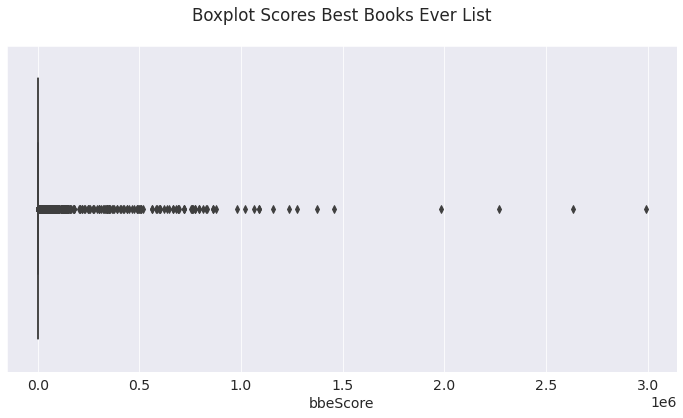

In [44]:
# set the 'darkgrid' style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))

# plot specs
plt.title("Boxplot Scores Best Books Ever List", pad=25)
plt.xlabel('bbeScore')

# plot the boxplot
sns.boxplot(x=df.bbeScore);

The distribution is very wide, with a lot of books having relatively low scores, and some books having very high scores. For this reason, the boxplot itself is condensed into a single line on the lower end of the axis.

Let us take a closer look at books with a score on the lower end of the distribution (i.e. having a bbeScore of less than 1,000):

In [45]:
df_low_score = df[df.bbeScore < 1000]
len(df_low_score)

49086

Let's have a look at this distribution of low scores. Here we use the [Plotly Graphing Library](https://plotly.com/python/), which allows for for creating interactive charts, to visualize the distribution using a histogram and a boxplot:

In [46]:
fig = px.histogram(df_low_score, 
                   x='bbeScore', 
                   marginal='box', # plot a boxplot above the histogram
                   title='Histogram Books with Low Scores')
fig.update_layout(bargap=0.1)
fig.show()

Hovering over the histogram, there appear to be 182 books with a score of 0 to 4. Let's check out how many entries have a score of exactly zero:

In [47]:
df[df.bbeScore == 0]

title                                             author  \
52420    Attracted to Fire                     DiAnn Mills (Goodreads Author)   
52421            Elemental                  Kim Richardson (Goodreads Author)   
52422         Unbelievable                   Sherry Gammon (Goodreads Author)   
52423            Fractured                   Cheri Schmidt (Goodreads Author)   
52424              Anasazi                                      Emma Michaels   
52425               Marked                  Kim Richardson (Goodreads Author)   
52426          Wayward Son  Tom Pollack (Goodreads Author), John Loftus (G...   
52427  Daughter of Helaman                    Misty Moncur (Goodreads Author)   

       bbeScore  bbeVotes           isbn                series language pages  \
52420         0         1  9781414348643                   NaN  English   416   
52421         0         1     B005IGOSCC     Soul Guardians #2  English   151   
52422         0         1  9781477594247          Port Fare #2  English   360   
52423         0         1  2940012616562            Fateful #2  English     0   
52424         0         1  9999999999999     Sense of Truth #2  English   190   
52425         0         1  9781461017097     Soul Guardians #1  English   280   
52426         0         1  9781450755634                   NaN  English   507   
52427         0         1  9781599554976  Stripling Warrior #1  English   201   

       rating  numRatings  likedPercent         publishDate  \
52420    4.14        2143          95.0    October 1st 2011   
52421    4.07        1947          94.0    August 21st 2011   
52422    4.16        1028          94.0     April 11th 2013   
52423    4.00         871          94.0       May 28th 2011   
52424    4.19          37          95.0     August 5th 2011   
52425    3.70        6674          84.0     March 18th 2011   
52426    3.85         238          90.0  September 1st 2011   
52427    4.02         246          90.0        May 8th 2011   

          firstPublishDate  
52420  September 16th 2011  
52421      August 1st 2011  
52422      March 30th 2013  
52423                  NaN  
52424      August 3rd 2011  
52425      March 15th 2011  
52426       April 5th 2011  
52427                  NaN

There are eight books with a bbeScore of zero, and they are all in the very bottom of the list. I think these should not be in the list, and will remove them:

In [48]:
# check shape before dropping
df.shape

(52421, 13)

In [49]:
# drop all rows that contain bbeScore = 0
df.drop(df[df.bbeScore == 0].index, inplace=True)

In [50]:
# check shape after dropping
df.shape

(52413, 13)

#### bbeVotes

bbeVotes is a numerical column, and as such we can check out the summary statistics:

In [51]:
df.bbeVotes.describe()

count    52413.000000
mean        22.555683
std        369.386602
min         -4.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      30516.000000
Name: bbeVotes, dtype: float64

The minimum number of bbeVotes is negative (-4), which looks like an error. Let us investigate how many records have zero votes, and how many have negative votes:

In [52]:
df[df.bbeVotes == 0]

title                                             author  \
43852      The Confession                                      Beverly Lewis   
44153  Love at First Bite  Sherrilyn Kenyon (Goodreads Author) (Contribut...   

       bbeScore  bbeVotes           isbn  \
43852        72         0  9781556618673   
44153        71         0  9780312349295   

                                              series language pages  rating  \
43852            The Heritage of Lancaster County #2  English   286    4.06   
44153  Wild Wulfs of London #2.5 - The Forgotten One  English   373    4.06   

       numRatings  likedPercent       publishDate firstPublishDate  
43852        8549          95.0              1997              NaN  
44153        8177          95.0  October 3rd 2006              NaN

In [53]:
len(df[df.bbeVotes < 0])

52

Two books have score zero, whereas 52 books have a negative value. Let's take a look at a sample of the latter:

In [54]:
df[df.bbeVotes < 0].head(3)

title  \
12222                                               Cane   
15322  Adventures of a Psychic: The Fascinating and I...   
15437                                        James Joyce   

                                                 author  bbeScore  bbeVotes  \
12222                                       Jean Toomer       193        -1   
15322  Sylvia Browne, Antoinette May (Goodreads Author)       162        -1   
15437                                   Richard Ellmann       160        -2   

                isbn series language pages  rating  numRatings  likedPercent  \
12222  9780871401519    NaN  English   144    3.87        8350          91.0   
15322  9781561706211    NaN  English   249    3.95        1555          92.0   
15437  9780195033816    NaN  English   887    4.33        2398          97.0   

              publishDate firstPublishDate  
12222    August 17th 1993         10/29/23  
15322  September 1st 1998         03/29/90  
15437   October 20th 1983         10/30/59

It is indeed strange to see that these books with negative number of votes do have a bbeScore. All in all, books with 0 votes or less are probably a data error entry, and since these are not ranked high on the list either I will remove them:

In [55]:
# check shape before dropping
df.shape

(52413, 13)

In [56]:
# drop all rows that contain bbeVots <= 0
df.drop(df[df.bbeVotes <= 0].index, inplace=True)

In [57]:
# check shape after dropping
df.shape

(52359, 13)

#### Language

Language can be viewed as a categorical column. We saw earlier that the Language column is missing some data. Let's check this out:

In [58]:
df[df.language.isna()]

title  \
503                                 Mistress Suffragette   
570                                   Invisible Monsters   
645                                House of Sand and Fog   
703                        The Awakening: Fate in Motion   
751              One Fish, Two Fish, Red Fish, Blue Fish   
...                                                  ...   
52361                                         Pixie Dust   
52366                                        When I Fall   
52379  Did God Really Command Genocide?: Coming to Te...   
52404                                      Au Petit Poil   
52414                                          Algedonic   

                                    author  bbeScore  bbeVotes           isbn  \
503        Diana Forbes (Goodreads Author)     18215       203     B06XG3G2TF   
570     Chuck Palahniuk (Goodreads Author)     15186       181  9780393355956   
645                        Andre Dubus III     12262       176  9780393356342   
703    Suzanne Boisvert (Goodreads Author)     10611       118     B07GNSZH8M   
751                     Dr. Seuss (Reader)      9731       163  9780007173686   
...                                    ...       ...       ...            ...   
52361         Laura Lee (Goodreads Author)         2         1  9781465812780   
52366        J. Daniels (Goodreads Author)         2         1  9999999999999   
52379           Paul Copan, Matt Flannagan         2         1  9780801016226   
52404                            A.A. Fair         1         1  9782702427651   
52414          R.H. Sin (Goodreads Author)         1         1  9781449494223   

                         series language pages  rating  numRatings  \
503                         NaN      NaN   333    4.34        7647   
570                         NaN      NaN   304    3.98      128254   
645                         NaN      NaN   368    3.85      125230   
703                         NaN      NaN   331    4.31        6682   
751                         NaN      NaN    64    4.13      165623   
...                         ...      ...   ...     ...         ...   
52361  Pixie Dust Chronicles #1      NaN   NaN    3.79        1373   
52366         Alabama Summer #3      NaN   343    4.30       12022   
52379                       NaN      NaN   352    4.18         114   
52404          Cool and Lam #26      NaN   154    3.89          96   
52414                       NaN      NaN   128    3.71        1489   

       likedPercent         publishDate   firstPublishDate  
503            97.0            03/05/17                NaN  
570            92.0            05/01/18           09/17/99  
645            90.0            10/02/18           10/28/99  
703            96.0            09/15/18                NaN  
751            93.0            10/06/03           10/28/60  
...             ...                 ...                ...  
52361          86.0  December 31st 2011                NaN  
52366          97.0     March 17th 2015                NaN  
52379          94.0  November 18th 2014  October 21st 2014  
52404          95.0                1997               1965  
52414          83.0  December 12th 2017                NaN  

[3795 rows x 13 columns]

Since 'NaN' is of the type 'float' and the remaining entries are of the type 'str', I will convert any 'NaN' into the string 'Unknown':

In [59]:
# replace nan with 'Unknown'
df.language = df.language.fillna('Unknown')

In [60]:
# verify the nan's have been replaced
len(df[df.language.isna()])

0

Now let's check out the languages:

In [61]:
# create a list of the unique languages
languages = df.language.unique()
languages

array(['English', 'French', 'German', 'Persian', 'Arabic', 'Unknown',
       'Spanish', 'Multiple languages', 'Portuguese', 'Indonesian',
       'Turkish', 'Polish', 'Bulgarian', 'Tamil', 'Japanese', 'Romanian',
       'Italian', 'French, Middle (ca.1400-1600)', 'Norwegian', 'Urdu',
       'Dutch', 'Finnish', 'Marathi', 'Chinese', 'Swedish', 'Icelandic',
       'Malayalam', 'Croatian', 'Estonian', 'Greek, Modern (1453-)',
       'Russian', 'Kurdish', 'Danish', 'Hindi', 'Filipino; Pilipino',
       'Serbian', 'Bengali', 'Malay', 'Catalan; Valencian', 'Czech',
       'Vietnamese', 'Armenian', 'Georgian', 'Kannada', 'Korean',
       'Nepali', 'Slovak', 'Telugu', 'Hungarian',
       'English, Middle (1100-1500)', 'Azerbaijani', 'Farsi',
       'Lithuanian', 'Ukrainian', 'Bokmål, Norwegian; Norwegian Bokmål',
       'Iranian (Other)', 'Faroese', 'Basque', 'Macedonian', 'Maltese',
       'Gujarati', 'Amharic', 'Aromanian; Arumanian; Macedo-Romanian',
       'Assamese', 'Panjabi; Punjabi', 'A

In order to better inspect this we will sort the languages alphabetically:

In [62]:
np.sort(languages)

array(['Afrikaans', 'Albanian', 'Aleut', 'Amharic', 'Arabic', 'Armenian',
       'Aromanian; Arumanian; Macedo-Romanian', 'Assamese',
       'Australian languages', 'Azerbaijani', 'Basque', 'Bengali',
       'Bokmål, Norwegian; Norwegian Bokmål', 'Bosnian', 'Bulgarian',
       'Catalan; Valencian', 'Chinese', 'Croatian', 'Czech', 'Danish',
       'Duala', 'Dutch', 'Dutch, Middle (ca.1050-1350)', 'English',
       'English, Middle (1100-1500)', 'Estonian', 'Faroese', 'Farsi',
       'Filipino; Pilipino', 'Finnish', 'French',
       'French, Middle (ca.1400-1600)', 'Galician', 'Georgian', 'German',
       'Greek, Ancient (to 1453)', 'Greek, Modern (1453-)', 'Gujarati',
       'Hindi', 'Hungarian', 'Icelandic', 'Indonesian', 'Iranian (Other)',
       'Italian', 'Japanese', 'Kannada', 'Korean', 'Kurdish', 'Latvian',
       'Lithuanian', 'Macedonian', 'Malay', 'Malayalam', 'Maltese',
       'Marathi', 'Mayan languages', 'Mongolian', 'Multiple languages',
       'Nepali', 'Norwegian', 'Norwe

I do not notice any abnormalities in  the resulting list of languages.

#### Pages

I would expect the column `pages` to be numerical, yet its datatype is listed as `object`. I will now turn this into a numerical datatype:

In [63]:
df['pages'] = pd.to_numeric(df.pages, errors='coerce')

Let us inspect the result:

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52359 entries, 0 to 52419
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             52359 non-null  object 
 1   author            52359 non-null  object 
 2   bbeScore          52359 non-null  int64  
 3   bbeVotes          52359 non-null  int64  
 4   isbn              52359 non-null  object 
 5   series            23402 non-null  object 
 6   language          52359 non-null  object 
 7   pages             49996 non-null  float64
 8   rating            52359 non-null  float64
 9   numRatings        52359 non-null  int64  
 10  likedPercent      51738 non-null  float64
 11  publishDate       51483 non-null  object 
 12  firstPublishDate  31080 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 5.6+ MB


Turning the pages into numerical datatype, 'sacrificed' 23 rows with non-compliant data, which is acceptable. Now let's view the summary statistics:

In [65]:
df.pages.describe()

count    49996.000000
mean       328.702896
std        252.322946
min          0.000000
25%        210.000000
50%        304.000000
75%        392.000000
max      14777.000000
Name: pages, dtype: float64

It appears some books have 0 pages, which is impossible. Also the maximum number of 14,777 pages that is reported seems quite high (though not impossible).

Let us first look at the distribution:

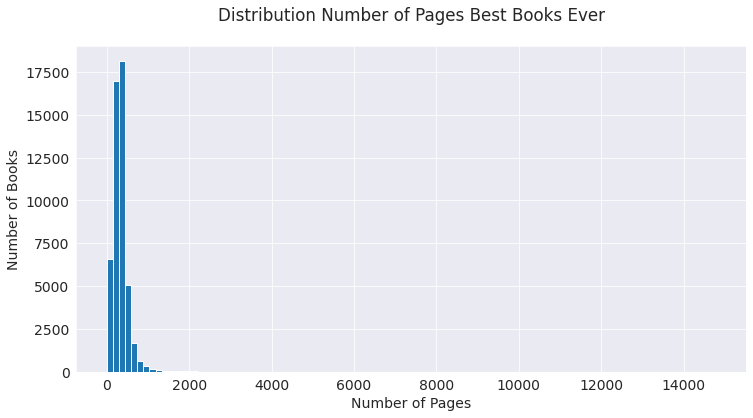

In [66]:
# plot specs
plt.figure(figsize=(12,6))
plt.title("Distribution Number of Pages Best Books Ever", pad=25)
plt.xlabel('Number of Pages')
plt.ylabel('Number of Books')

# create histogram
plt.hist(df.pages, bins=100);

The distribution is slightly skewed to the right. Let's check out the three tickest books in the list:

In [67]:
# Check the three thickest books
df.sort_values(by=['pages'], ascending=False).head(3)

title  \
11490                The Story of Civilization   
22960               The Complete Wheel of Time   
8374   The Complete Malazan Book of the Fallen   

                                                  author  bbeScore  bbeVotes  \
11490                          Will Durant, Ariel Durant       198         2   
22960  Robert Jordan, Brandon Sanderson (Goodreads Au...        99         1   
8374                   Steven Erikson (Goodreads Author)       298         3   

                isbn                            series language    pages  \
11490  9781567310238   The Story of Civilization #1-11  English  14777.0   
22960  9780765376862        The Wheel of Time #omnibus  English  11095.0   
8374   9780765376855  Malazan Book of the Fallen #1-10  English   8258.0   

       rating  numRatings  likedPercent        publishDate firstPublishDate  
11490    4.43        1506          97.0      June 1st 1993         10/29/75  
22960    4.61        2979          98.0           May 2014              NaN  
8374     4.72        1667          97.0  January 28th 2014              NaN

Browsing through the internet indeed learned me that these are legit entries:
- The Story of Civilization: consists of 11 volumes, according to Wikipedia of 13,549 pages
- The Complete Wheel of Time: series of fantasy novels that indeed adds upp to over 10,000 pages
- The Complete Malazan Book of the Fallen: series of epic fantasy novels, reaching to approx. 7,000-8,000 pages

All in all, it seems reasonable to include all the 'thick' books on the 'right-tail' of the distribution.

A bit more complex is to investigate the 'thin' books on the left end of the distribution. By definition, a book cannot have zero pages. Let's see how many there are:

In [68]:
len(df[df.pages == 0])

163

Since these contribute to the statistics, we will replace them with NaN using the `.replace` function:

In [69]:
df.shape

(52359, 13)

In [70]:
df.pages.replace(0, np.nan, inplace=True)

In [71]:
len(df[df.pages == 0])

0

Now let us investigate any books under 20 pages:

In [72]:
len(df[(df.pages > 0) & (df.pages < 20)])

287

287 books is quite a lot to investigate, therefore let us reduce this to all books under five pages:

In [73]:
len(df[(df.pages > 0) & (df.pages < 5)])

27

Let us randomly check out three books with less than five but more than zerp pages:

In [74]:
df[(df.pages > 0) & (df.pages < 5)].sample(3)

title                            author  \
45189                            Vignette    Jim Butcher (Goodreads Author)   
17592  Thomas’s First Memory of the Flare  James Dashner (Goodreads Author)   
15608            Lost Scene from Hallowed   Cynthia Hand (Goodreads Author)   

       bbeScore  bbeVotes           isbn                  series language  \
45189        67         1  9999999999999  The Dresden Files #5.5  English   
17592       107         2  9999999999999    The Maze Runner #2.5  English   
15608       158         2  9999999999999          Unearthly #2.1  English   

       pages  rating  numRatings  likedPercent        publishDate  \
45189    3.0    4.06        3582          96.0               2008   
17592    4.0    3.98        7494          92.0  October 11th 2011   
15608    4.0    3.88        3621          91.0                NaN   

      firstPublishDate  
45189              NaN  
17592              NaN  
15608         10/30/12

It was found that:
- A Search for God, Book I	 => 134 pages
- Harry Potter: The Prequel => 800-word story, hence 4 pages seem to be correct - one can debate whether this classifies as a book or not
- Night on the Galactic Railroad => 112 pages

All in all, the data is in my opinion not trustworthy when it comes to books with a low number of pages. Therefore, I will replace all books < 20 pages with 'NaN' using the `.where` function:

In [75]:
df.pages.where(df.pages > 20, np.nan, inplace=True)

Let us verify whether the operation was succesfully executed:

In [76]:
len(df[(df.pages > 0) & (df.pages < 20)])

0

In [77]:
df.pages.describe()

count    49524.000000
mean       331.761954
std        251.559098
min         21.000000
25%        215.000000
50%        304.000000
75%        394.000000
max      14777.000000
Name: pages, dtype: float64

#### Rating

The `rating` column indicates the average Goodreads rating of each book. Let's check out the summary statistics:

In [78]:
df.rating.describe()

count    52359.000000
mean         4.021865
std          0.367141
min          0.000000
25%          3.820000
50%          4.030000
75%          4.230000
max          5.000000
Name: rating, dtype: float64

On the Goodreads platform, the user can rate a book on a scale from 1 to 5 stars. For each record the average rating is listed in the `rating` column. The summary statistics points out that the minimum is `0`. In theory this could be possible only when a book has never been rated.

Let's have a more detailed look at the distribution of this column:

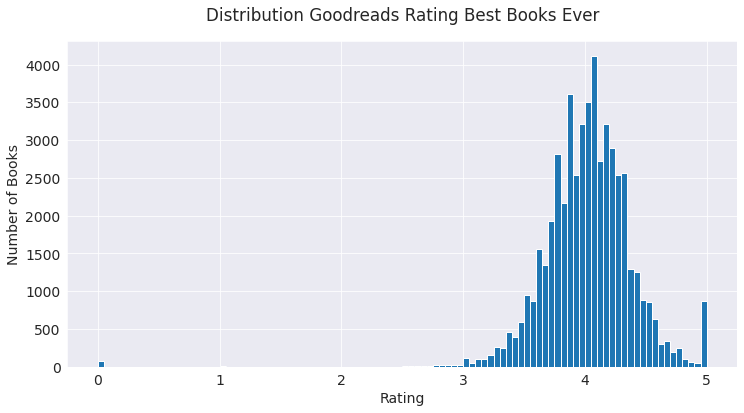

In [79]:
# plot specs
plt.figure(figsize=(12,6))
plt.title("Distribution Goodreads Rating Best Books Ever", pad=20)
plt.xlabel('Rating')
plt.ylabel('Number of Books')

# create histogram
plt.hist(df.rating, bins=100);

From the histogram and summary statistics it follows that the Rating is normally distributed around mean and median of ~4.0.The histogram shows the distribution tails off around 2, with some data points observed around values 1 and 0. Let's see how many there are:


In [80]:
len(df[df.rating < 1.2])

75

In [81]:
len(df[df.rating == 0])

71

75 records have a rating lower than 1.2, 71 of which have a rating of 0. Let's check the latter out:

In [82]:
df[df.rating == 0]

title  \
8321                                          Her Beauty   
17834  Mach Deine Träume Wahrverwirkliche Deine Ziele...   
17907                    Mindtronics! And Inquiry Alive!   
18197                                       Moon Secrets   
18618                   Aphrodisiac Concupiscence Deluxe   
...                                                  ...   
42053  Fatal Choice: Nuclear Weapons And The Illusion...   
42417        The Choice: Nuclear Weapons Versus Security   
45625                             Respect and Resilience   
48682                        Pornography: The Other Side   
51440  Princess Diana Life After Death of the English...   

                                                  author  bbeScore  bbeVotes  \
8321                     M.R. Desmond (Goodreads Author)       300         3   
17834                                     Roeland Suylen       100         1   
17907                                   William C. Bruce       100         1   
18197                    J.J. Gregory (Goodreads Author)       100         1   
18618                Yolanda Williams (Goodreads Author)       100         1   
...                                                  ...       ...       ...   
42053                                     Richard Butler        77         1   
42417                                         Gwyn Prins        76         1   
45625  Mia S. Beck (Goodreads Author), Stine Falkenbe...        65         1   
48682                                   F.M. Christensen        47         1   
51440                               Emanuela Maria Lecca        19         1   

                isbn                        series language  pages  rating  \
8321      B07H3CZJ9K                           NaN  Unknown   30.0     0.0   
17834  9783866161276                           NaN  Unknown    NaN     0.0   
17907  9780970480156                           NaN  Unknown    NaN     0.0   
18197  9781452082448           Alien Ambassador #3  English  336.0     0.0   
18618  9781441531766                           NaN  English   62.0     0.0   
...              ...                           ...      ...    ...     ...   
42053  9780813339801                           NaN  English  200.0     0.0   
42417  9780701139377                           NaN  Unknown   56.0     0.0   
45625  9999999999999  Larva High School: Book 1 #2  English    NaN     0.0   
48682  9780313360572                           NaN  English  188.0     0.0   
51440  9781469195940                           NaN  English  100.0     0.0   

       numRatings  likedPercent         publishDate firstPublishDate  
8321            0           NaN  September 3rd 2018              NaN  
17834           0           NaN                 NaN              NaN  
17907           0           NaN                 NaN              NaN  
18197           0           NaN  February 22nd 2011              NaN  
18618           0           NaN       May 24th 2010              NaN  
...           ...           ...                 ...              ...  
42053           0           NaN  December 14th 2001              NaN  
42417           0           NaN     April 27th 1993              NaN  
45625           0           NaN                 NaN              NaN  
48682           0           NaN        May 7th 1990         05/01/90  
51440           0           NaN        May 1st 2012              NaN  

[71 rows x 13 columns]

From inspection of this dataframe, it appears that books with a rating of 0, have zero ratings. However, they do seem to have received at least one vote, hence we will keep them in.

#### numRatings

The `numRatings` column indicates how often a book is rated on the Goodreads platform.

In [83]:
df.numRatings.describe()

count    5.235900e+04
mean     1.790066e+04
std      1.040506e+05
min      0.000000e+00
25%      3.410000e+02
50%      2.312000e+03
75%      9.396000e+03
max      7.048471e+06
Name: numRatings, dtype: float64

The mean (~ 18,000) is an order of magnitude higher than the median (~ 2,300), hence the distribution is positively skewed. Let's visualize this using a histogram:

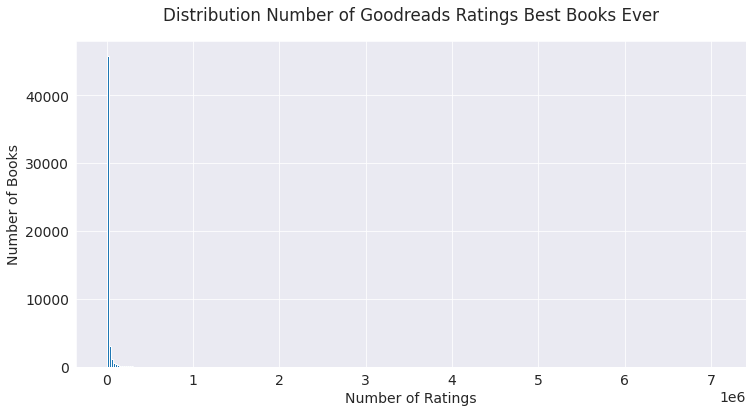

In [84]:
# plot specs
plt.figure(figsize=(12,6))
plt.title("Distribution Number of Goodreads Ratings Best Books Ever", pad=20)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')

# create histogram
plt.hist(df.numRatings, bins=300);

One can imagine that some titles get a lot of ratings, and others way less. Let us look at the ones with the lowest number of ratings:

In [85]:
df.sort_values(by=['numRatings'])

title  \
25787              Jobless at 50: Where to Go From Here?   
18840                           The Equanimity Knowledge   
28472                                          giveaways   
22518                                            Destiny   
42053  Fatal Choice: Nuclear Weapons And The Illusion...   
...                                                  ...   
27                                      The Great Gatsby   
2                                  To Kill a Mockingbird   
4                                               Twilight   
0                                       The Hunger Games   
32                 Harry Potter and the Sorcerer's Stone   

                                              author  bbeScore  bbeVotes  \
25787                              R. Trent Thompson        97         1   
18840                               Benjamin N.Nweke       100         1   
28472                                 A.N. Shekarnia        96         1   
22518             Michele Scalini (Goodreads Author)        99         1   
42053                                 Richard Butler        77         1   
...                                              ...       ...       ...   
27     F. Scott Fitzgerald, Francis Scott Fitzgerald    755074      8142   
2                                         Harper Lee   2269402     23328   
4                                    Stephenie Meyer   1459448     14874   
0                                    Suzanne Collins   2993816     30516   
32         J.K. Rowling, Mary GrandPré (Illustrator)    691430      7348   

                isbn                 series language  pages  rating  \
25787  9999999999999                    NaN  English    NaN    0.00   
18840  9781468911411                    NaN  English  485.0    0.00   
28472  9999999999999                    NaN  English  426.0    0.00   
22518  9786050327809                    NaN  Italian    NaN    0.00   
42053  9780813339801                    NaN  English  200.0    0.00   
...              ...                    ...      ...    ...     ...   
27     9999999999999                    NaN  English  200.0    3.92   
2      9999999999999  To Kill a Mockingbird  English  324.0    4.28   
4      9780316015844   The Twilight Saga #1  English  501.0    3.60   
0      9780439023481    The Hunger Games #1  English  374.0    4.33   
32     9999999999999        Harry Potter #1  English  309.0    4.47   

       numRatings  likedPercent         publishDate firstPublishDate  
25787           0           NaN                 NaN              NaN  
18840           0           NaN      July 26th 2012              NaN  
28472           0           NaN  February 23rd 2011              NaN  
22518           0           NaN   October 17th 2014         10/01/14  
42053           0           NaN  December 14th 2001              NaN  
...           ...           ...                 ...              ...  
27        3775504          90.0            09/28/04         04/10/25  
2         4501075          95.0            05/23/06         07/11/60  
4         4964519          78.0            09/06/06         10/05/05  
0         6376780          96.0            09/14/08              NaN  
32        7048471          96.0            11/01/03         06/26/97  

[52359 rows x 13 columns]

Indeed, it is possible that some books without any rating can still get a vote and hence make it to the list.

#### likedPercent

This is a derived field, consisting of the share of ratings over 2 stars that a book has received on the Goodreads platform. Let's check out the summary statistics and the distribution:

In [86]:
df.likedPercent.describe()

count    51738.000000
mean        92.231880
std          5.987193
min          0.000000
25%         90.000000
50%         94.000000
75%         96.000000
max        100.000000
Name: likedPercent, dtype: float64

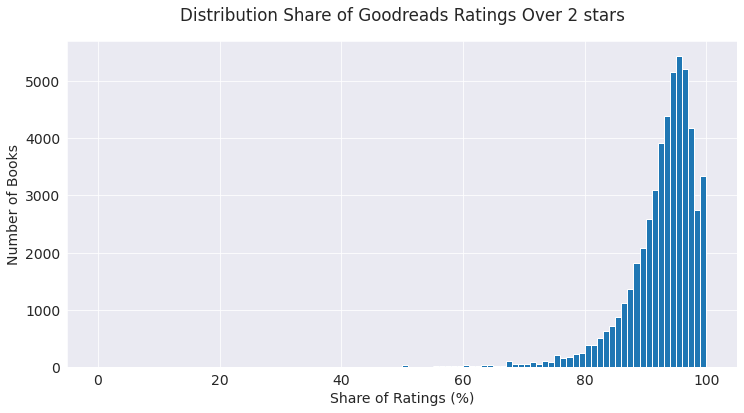

In [87]:
# plot specs
plt.figure(figsize=(12,6))
plt.title("Distribution Share of Goodreads Ratings Over 2 stars", pad=20)
plt.xlabel('Share of Ratings (%)')
plt.ylabel('Number of Books')

# create histogram
plt.hist(df.likedPercent, bins=100);

It can be observed that this is a left-skewed distribution; the mean (~92) is smaller than median (94). As expected a high percentage of books have received a high number of ratings of more than two stars.

#### Dates Columns
There are two columns containing dates. On the Kaggle site describing the dataset one can read:

*The data was retrieved in two sets, the first 30000 books and then the remaining 22478. Dates were not parsed and reformated on the second chunk so publishDate and first publish date are in a mm/dd/yyyy format for the first 30000 records and Month Day Year for the rest.*


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52359 entries, 0 to 52419
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             52359 non-null  object 
 1   author            52359 non-null  object 
 2   bbeScore          52359 non-null  int64  
 3   bbeVotes          52359 non-null  int64  
 4   isbn              52359 non-null  object 
 5   series            23402 non-null  object 
 6   language          52359 non-null  object 
 7   pages             49524 non-null  float64
 8   rating            52359 non-null  float64
 9   numRatings        52359 non-null  int64  
 10  likedPercent      51738 non-null  float64
 11  publishDate       51483 non-null  object 
 12  firstPublishDate  31080 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 5.6+ MB


Let's check out some samples: 

In [89]:
# Check 5 random entries from the top of the list
df[:1000].publishDate.sample(8)

872      October 1st 1991
29               09/30/04
355              09/30/08
610              11/28/06
833    September 2nd 2010
585              03/01/89
680              01/01/01
617              04/05/11
Name: publishDate, dtype: object

In [90]:
# Check 5 random entries from the second half of the list
df[35000:].publishDate.sample(8)

37561     February 1st 2006
36597                  2004
39884    November 24th 1997
49669       March 23rd 2010
45786    February 14th 2013
41457       April 29th 2011
36006     January 12th 2010
47826       August 1st 1988
Name: publishDate, dtype: object

It appears that also in the top half of the list the date format is not consistent; i.e. both the format "May 6th 2008" and "11/01/05" can be observed. As such, I will not use these columns for the analysis. I would recommend re-scraping the data with a special emphasis on getting the Dates in a consistent format.

In [91]:
to_drop = ['publishDate', 'firstPublishDate']

In [92]:
# drop the columns from the existing dataframe
df.drop(to_drop, axis = 1, inplace = True)

This concludes the first part of the project, in which I performed data preparation and cleaning. Let's check out the `shape` of the resulting dataframe:

In [93]:
df.shape

(52359, 11)

The resulting dataframe has 52,369 rows and 11 columns and will be used for the second part of this notebook: Exploratory Analysis and Visualization:

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52359 entries, 0 to 52419
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         52359 non-null  object 
 1   author        52359 non-null  object 
 2   bbeScore      52359 non-null  int64  
 3   bbeVotes      52359 non-null  int64  
 4   isbn          52359 non-null  object 
 5   series        23402 non-null  object 
 6   language      52359 non-null  object 
 7   pages         49524 non-null  float64
 8   rating        52359 non-null  float64
 9   numRatings    52359 non-null  int64  
 10  likedPercent  51738 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.8+ MB


## 3. Exploratory Analysis and Visualization


After having cleaned the data, I will now carry out exploratory analysis and visualization.

Before asking specific questions, I will explore the following columns into more detail:

1. bbeScore: the score, which determines the position in the list
2. bbeVotes: the number of votes a book has received
3. language: the language in which the book is written
4. pages: the number of pages of the book
5. rating: the average Goodreads rating of the book
6. numRatings: the number of times the books has been rated on Goodreads

### Column 1: bbeScore

This is a key factor, since it determines the ranking of the book on the list. Let's pull up the summary statistics first:

In [95]:
df.bbeScore.describe()

count    5.235900e+04
mean     1.988339e+03
std      3.519295e+04
min      1.000000e+00
25%      8.400000e+01
50%      9.700000e+01
75%      1.870000e+02
max      2.993816e+06
Name: bbeScore, dtype: float64

The summary statistics point out that some books acquired a very high score, with the top book reaching a score of nearly 3 million. 50% of the data has a score of 97 or lower. As such, the distribution is heavily skewed to the right. In order to visualize the distribution using a boxplot with a [logarithmic scale](https://en.wikipedia.org/wiki/Logarithmic_scale) on the y-axis:

In [96]:
fig = px.box(df, y="bbeScore", log_y = True, width=600, height=700, title='Boxplot Scores Best Books Ever List')
fig.show()

Let's calculate how many books have a score higher than 0.5 million:

In [97]:
len(df[df.bbeScore > 5e5])

51

Only 51 books received a score of 0.5 million or higher

### Column 2: bbeVotes

It is expected that this column is highly correlated with bbeScore (since the more votes, the higher the ranking on the list). Let us have a look at the summary statistics of the votes:

In [98]:
df.bbeVotes.describe()

count    52359.000000
mean        22.580435
std        369.576233
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      30516.000000
Name: bbeVotes, dtype: float64

In addition, let's check the number of total votes that have been casted:

In [99]:
# Compute total number of votes on the list (in million)
total_votes = df.bbeVotes.sum()
total_votes

1182289

A total of nearly 1.2 million votes have been casted.

In [100]:
fig = px.box(df, y="bbeVotes", log_y = True, width=600, height=700, title="Boxplot Votes Best Books Ever List")
fig.show()

The summary statistics teach us that 75% of the data has 2 votes or less, and that the maximum number of votes is 30516. Let's check out how many books have received at least 100 votes:

In [101]:
len(df[df.bbeVotes >= 100])

907

And let's check out how many books have received at least 500 votes:

In [102]:
len(df[df.bbeVotes >= 500])

308

Let's create a dataframe `df_high_votes` containing the top-300 books that we can use in case we only want to focus our analysis on books with a high number (>500) of votes:

In [103]:
df_high_votes = df[:300]

Here we found that the number of votes is heavily skewed to the left. 75% of the books in the list have received 2 votes or less, whereas 907 books have received at least 100 votes, and the largest number of votes given to a book is 30,516.

### Column 3: Language

Let us have a look at the languages in which the books are written. First we will inspect the number of different languages:

In [104]:
len(df.language.unique())

82

Apparently, the books are written in 82 different languages. Let us inspect this further:

In [105]:
df.language.value_counts()

English                                  42579
Unknown                                   3795
Arabic                                    1036
Spanish                                    684
French                                     576
                                         ...  
Aromanian; Arumanian; Macedo-Romanian        1
Basque                                       1
Faroese                                      1
Iranian (Other)                              1
Norwegian Nynorsk; Nynorsk, Norwegian        1
Name: language, Length: 82, dtype: int64

Here we see that English really stands out, with 42,543 books published in English. Let us compute the percentage of the books written in a certain language:

In [106]:
lang_perc = 100 * df.language.value_counts(normalize=True)
lang_perc

English                                  81.321263
Unknown                                   7.248038
Arabic                                    1.978647
Spanish                                   1.306366
French                                    1.100097
                                           ...    
Aromanian; Arumanian; Macedo-Romanian     0.001910
Basque                                    0.001910
Faroese                                   0.001910
Iranian (Other)                           0.001910
Norwegian Nynorsk; Nynorsk, Norwegian     0.001910
Name: language, Length: 82, dtype: float64

Let's display the top-15 languages:

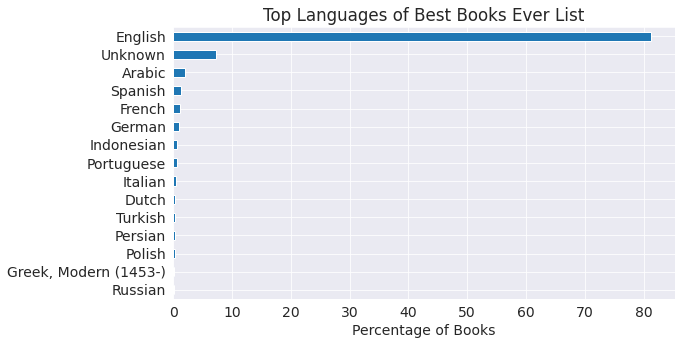

In [107]:
plt.title('Top Languages of Best Books Ever List')
plt.xlabel('Percentage of Books')
lang_perc.head(15).sort_values().plot(kind='barh');

For easier visualization, let's also plot the top languages leaving out English and the category 'Unknown':

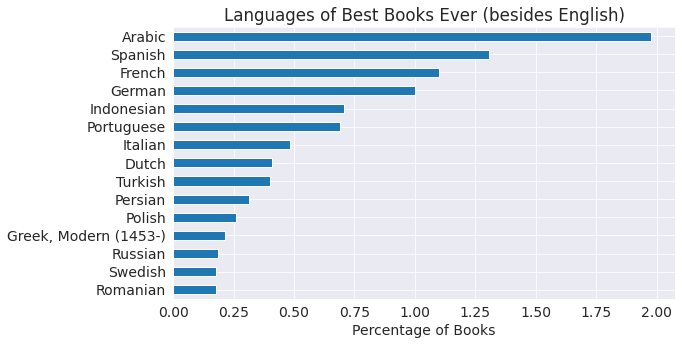

In [108]:
plt.title('Languages of Best Books Ever (besides English)')
plt.xlabel('Percentage of Books')
lang_perc[2:17].sort_values().plot(kind='barh');

Here it is confirmed that English stands out, with >80% of the best books being published in English. Arabic comes in second (2.0%) followed by Spanish (1.3% on the third place).

### Column 4: pages

It is known that the number of pages of a book can vary widely. As such, let's check out the distribution of pages in the Best Books Ever List:

In [109]:
df.pages.describe()

count    49524.000000
mean       331.761954
std        251.559098
min         21.000000
25%        215.000000
50%        304.000000
75%        394.000000
max      14777.000000
Name: pages, dtype: float64

In [110]:
fig = px.histogram(df, x="pages", title='Distribution of Number of Pages Best Books Ever')
fig.show()

The average book in the list has 332 pages and the median book has 304 pages. Interestingly, some books with very high pages can be observed as well. Let's check out the number books that have over 1000 pages:

In [111]:
len(df[df.pages > 1000])

650

650 books in the list have over 1000 pages.

### Column 5: Rating

The Best Books Ever list is created by voting. However, on the [Goodreads](https://www.goodreads.com/) website books can be judged as well by users. It would be interesting to see what the distribution of this Rating is:

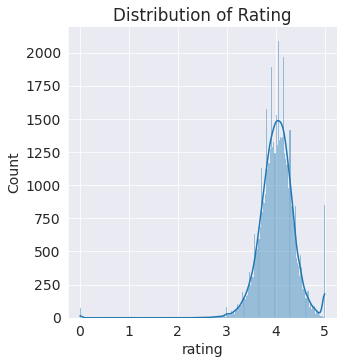

In [112]:
sns.displot(df.rating, kde=True)
plt.title("Distribution of Rating");

It appears that the rating of the books is normally distributed. It is interesting to see that the majority of ratings center around 4, with a little peak at 5. It can indeed be expected that we would see a little enrichment at 5: 5 is the maximum number of stars a book can get, and it can be expected that some books have an average rating very close to that number, since we are looking at the best books ever. As such, it is not surprising to hardly have any book with a rating lower than 3 in the list.

Let's also check out the summary statistics:

In [113]:
df.rating.describe()

count    52359.000000
mean         4.021865
std          0.367141
min          0.000000
25%          3.820000
50%          4.030000
75%          4.230000
max          5.000000
Name: rating, dtype: float64

Interestingly some books have an average Rating of 5. Let's sort the dataframe based on the Rating, and check out the top-10

In [114]:
df_ranked_rating = df.sort_values(by=['rating'], ascending=False)
df_ranked_rating.head(10)

title  \
28257  The Legislated Types of Jihaad and the Deviati...   
28839                                      The Aftermath   
27338                                   Written In Blood   
27359                                         Black Eden   
27389                                 From Sit to Gundog   
27415                                    A Flower Reborn   
27451                     School and My Bully Experience   
27587                                 When We Meet Again   
27602                               Unknown Book 8431510   
27788               Vanishing Worlds - Annelies' Journal   

                                                  author  bbeScore  bbeVotes  \
28257  Shaykh Salih Ibn Fawzan Al-Fawzan, صالح فوزان ...        96         1   
28839                 Stacy A. Padula (Goodreads Author)        96         1   
27338              Silvana G. Sánchez (Goodreads Author)        97         1   
27359                                  Dr. Mildred Dumas        97         1   
27389                                   Steven B. Reider        97         1   
27415                  Kirstin Graham (Goodreads Author)        97         1   
27451         Frank Joseph Minichetti (Goodreads Author)        97         1   
27587  Christina Corlett, Abra Ebner (Goodreads Autho...        96         1   
27602                                 Unknown Author 509        96         1   
27788                      Nadine May (Goodreads Author)        96         1   

                isbn                   series language  pages  rating  \
28257  9781927012338                      NaN  English    NaN     5.0   
28839  9999999999999  Montgomery Lake High #3  English  179.0     5.0   
27338  9781535240314                      NaN  Unknown  416.0     5.0   
27359  9798626981346                      NaN  English  364.0     5.0   
27389  9781645449232                      NaN  Unknown    NaN     5.0   
27415     B08818Z7VB                      NaN  English    NaN     5.0   
27451  9781733873406                      NaN  English  235.0     5.0   
27587  9781448646807         Fabulous Four #2  English  236.0     5.0   
27602  9999999999999                      NaN  Unknown    NaN     5.0   
27788  9999999999999                      NaN  English  456.0     5.0   

       numRatings  likedPercent  
28257           7         100.0  
28839          16         100.0  
27338           2         100.0  
27359           4         100.0  
27389           2         100.0  
27415           2         100.0  
27451           2         100.0  
27587           2         100.0  
27602           1         100.0  
27788           1         100.0

From above, we can observe that the top-ranked books by rating, are books that have a very little number of ratings. Indeed, it can be expected that books with a large number of ratings do not have an average of 5, because the likelyhood of everyone giving the same rating decreases with the number of votes.

### Column 6: numRatings

The rating discussed above is the average of all the individual ratings given to the book. The total number of times a book has been rates is captured in the `numRatings` feature. Let's have a look at the summary statistics:

In [115]:
df.numRatings.describe()

count    5.235900e+04
mean     1.790066e+04
std      1.040506e+05
min      0.000000e+00
25%      3.410000e+02
50%      2.312000e+03
75%      9.396000e+03
max      7.048471e+06
Name: numRatings, dtype: float64

From the summary statistics it follows that the maximum number of ratings is >7 million, whereas 25% of the books have received less than 344 ratings. As we saw before, the number of ratings should be taken into account when interpreting the Rating.

Similar to the number of votes, it will be interesting to see how many ratings the books in the list have acquired:

In [116]:
# Compute total number of ratings (in millions) on the list
total_ratings = int(df.numRatings.sum() / 1e6)
total_ratings

937

In [117]:
print("The books in the list have received a total of {} million ratings on the Goodreads platform.".format(total_ratings))

The books in the list have received a total of 937 million ratings on the Goodreads platform.


## 4. Asking and Answering Questions

After having investigated the individual columns, let's now have a look at some more specific questions about the dataset:


### Q1: What are the overall correlations between the numerical columns?

First we will paint a global picture about the relationships between the different numerical columns by computing and displaying all pairwise correlations in a `heatmap`:

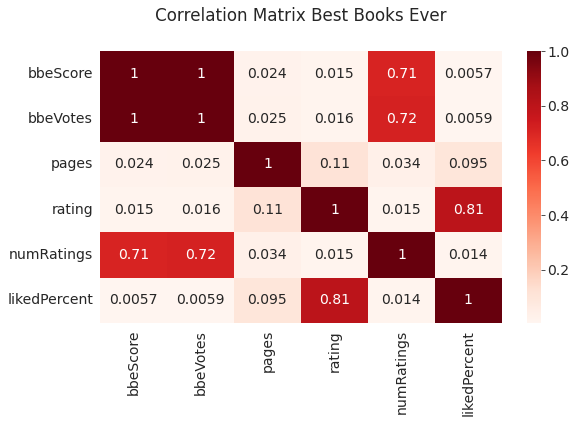

In [118]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix Best Books Ever', pad=30);

From above some interesting observations are made:

- there is a perfect correlation between `bbeVotes` and the `bbeScore` (further explored in Questions 2 and 3)
- there is a high correlation between `numRatings` and `bbeScore` (0.71) (further explored in Question 5), as well as between `numRatings` and `bbeVotes` (0.72)
- `rating` and `pages` do not correlate with `bbeScore` (further investigated in Questions 4 and 7, respectively)
- there is a high correlation between `likedPercent` and `rating`. This can be explained by the fact that `likedPercent` is a field derived from `ratingsByStars` (not part of this analysis), which indicates the percentage  of ratings over 2 stars. So, in general the higher the percentage of high ratings, the higher the global rating.

### Q2: Which books are in the top-25, and what are their scores and number of votes?

First let's create a dataframe that only contains the top-25 and only show the columns linked to the score and rating:

In [119]:
df_top = df.head(25)
df_top[['title', 'bbeScore','bbeVotes','rating','likedPercent']]

title  bbeScore  bbeVotes  \
0                                    The Hunger Games   2993816     30516   
1           Harry Potter and the Order of the Phoenix   2632233     26923   
2                               To Kill a Mockingbird   2269402     23328   
3                                 Pride and Prejudice   1983116     20452   
4                                            Twilight   1459448     14874   
5                                      The Book Thief   1372809     14168   
6                                         Animal Farm   1276599     13264   
7                            The Chronicles of Narnia   1238556     12949   
8   J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...   1159802     12111   
9                                  Gone with the Wind   1087732     11211   
10                             The Fault in Our Stars   1087056     11287   
11               The Hitchhiker's Guide to the Galaxy   1063601     10996   
12                                    The Giving Tree   1021534     10594   
13                                  Wuthering Heights    981502     10275   
14                                  The Da Vinci Code    876633      9231   
15                                Memoirs of a Geisha    862748      8993   
16                         The Picture of Dorian Gray    861799      9096   
17  Alice's Adventures in Wonderland & Through the...    833791      8812   
18                                          Jane Eyre    826759      8740   
19                                     Les Misérables    813088      8548   
20                                     Fahrenheit 451    793757      8537   
21                                          Divergent    793269      8339   
22                                  Lord of the Flies    773560      8230   
23                                   Romeo and Juliet    771784      8282   
24                                      The Alchemist    765587      8008   

    rating  likedPercent  
0     4.33          96.0  
1     4.50          98.0  
2     4.28          95.0  
3     4.26          94.0  
4     3.60          78.0  
5     4.37          96.0  
6     3.95          91.0  
7     4.26          96.0  
8     4.60          98.0  
9     4.30          94.0  
10    4.21          93.0  
11    4.22          94.0  
12    4.37          94.0  
13    3.86          88.0  
14    3.86          89.0  
15    4.12          95.0  
16    4.08          94.0  
17    4.06          94.0  
18    4.13          93.0  
19    4.18          93.0  
20    3.99          92.0  
21    4.19          94.0  
22    3.69          86.0  
23    3.75          87.0  
24    3.88          87.0

The top-25 will now be visualized in a horizontal bar chart. The books will be colored by the language in which they have been written by specifying the `hue` argument:

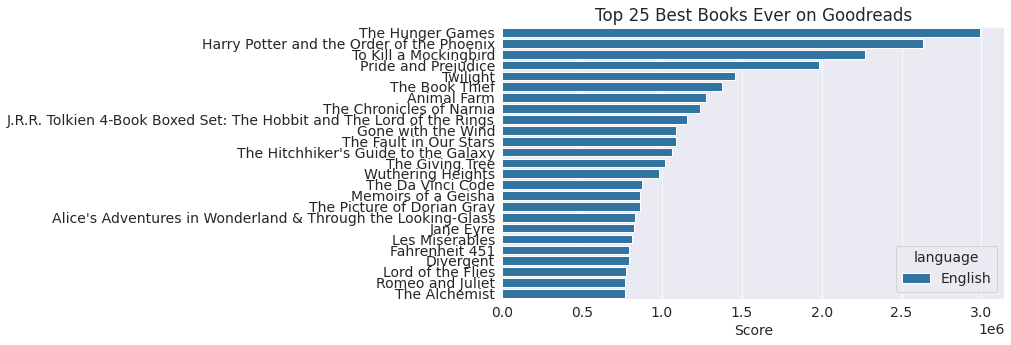

In [120]:
plt.title('Top 25 Best Books Ever on Goodreads')
sns.barplot(x="bbeScore", y="title", data=df_top, hue='language')
plt.xlabel('Score')
plt.ylabel('');

It can be observed that all books in the top-25 are written in English.

Now we plot the top-25, but we display the number of votes each book has received instead of the score:

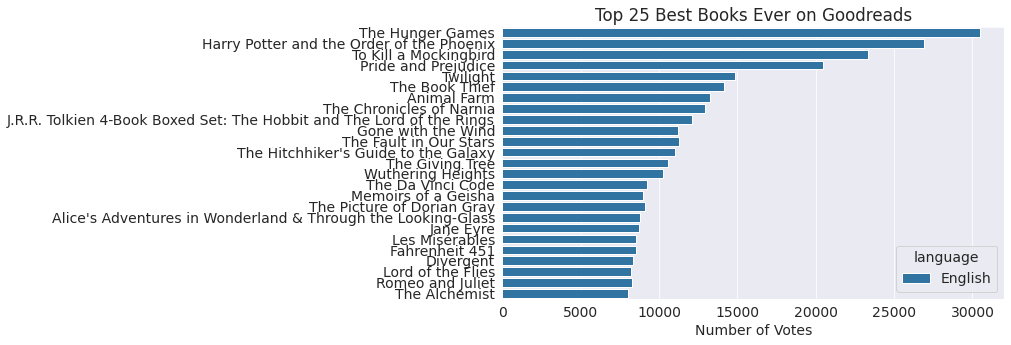

In [121]:
plt.title('Top 25 Best Books Ever on Goodreads')
sns.barplot(x="bbeVotes", y="title", data=df_top, hue='language')
plt.xlabel('Number of Votes')
plt.ylabel('');

From the plots above we can see that the order in the list would be slightly different when ranking is done solely by the number of Votes. For example, *The Picture of Dorian Gray* (position 17) has received more votes than the higher-ranked *Memoirs of a Geisha* (position 16), although the latter has a higher Goodreats rating:

In [122]:
df_top[['title', 'bbeScore','bbeVotes','rating','likedPercent']][15:17]

title  bbeScore  bbeVotes  rating  likedPercent
15         Memoirs of a Geisha    862748      8993    4.12          95.0
16  The Picture of Dorian Gray    861799      9096    4.08          94.0

On the other hand, *Gone with the Wind* (position 10) has received less votes and also a lower rating than *The Fault in Our Stars* (position 11). 

In [123]:
df_top[['title', 'bbeScore','bbeVotes','rating','likedPercent']][9:11]

title  bbeScore  bbeVotes  rating  likedPercent
9       Gone with the Wind   1087732     11211    4.30          94.0
10  The Fault in Our Stars   1087056     11287    4.21          93.0

This can be explained, as is also indicated on the Goodreads site, by knowing that a book's total score is based on multiple factors, including the number of votes and how highly those voters ranked the book. The current dataset does not have this data.

### Q3: What is the relationship between the bbeScore and the number of votes?

Intuitively, the higher the number of votes, the higher the score. Indeed, the heatmap created under Question 1 pointed to a (rounded) perfect correlation between `bbeScore` and `bbeVotes`. Let's visualize this relationship using a scatter plot:

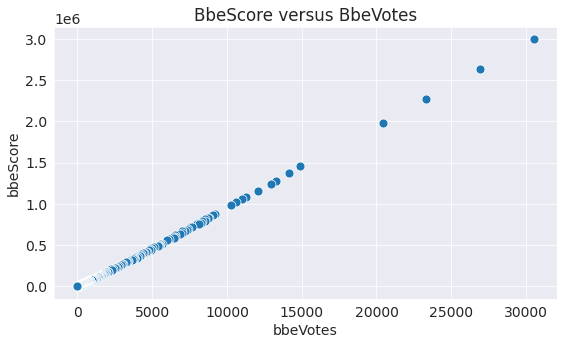

In [124]:
# Create a scatter plot
sns.scatterplot(x=df.bbeVotes, # X-axis
                y=df.bbeScore,  # Y-axis
                # Dot color
                s=80);

# Chart title
plt.title("BbeScore versus BbeVotes");

Let's compute the *correlation coefficient*:

In [125]:
df.bbeScore.corr(df.bbeVotes)

0.999303039686277

As expected, there is nearly pefect correlation (0.9993) between the number of bbeVotes and the bbeScore. Nevertheless, as we also saw by answering Question 2, other minor factors contribute to the score as well. All in all, the number of votes is the major determinant for the position of a book on the list.

### Q4: What is the relationship between the Score in Best Books Ever list and the Goodreads rating?

We saw that when sorted by Goodreads rating, some books top the list that have received very little ratings. As such, we should take into account the number of received ratings when answering this question.

Let's check how the number of ratings, in general, influences the Goodreads rating:

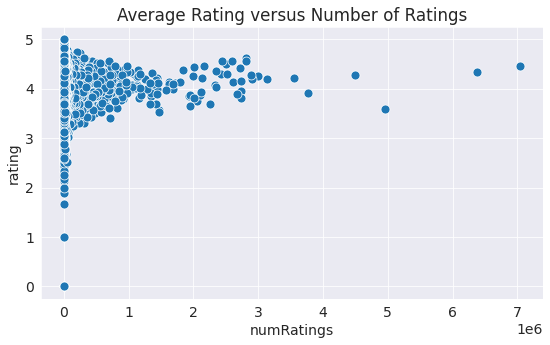

In [126]:
# Create a scatter plot
sns.scatterplot(x=df.numRatings, # X-axis
                y=df.rating,  # Y-axis
                # Dot color
                s=80);

# Chart title
plt.title("Average Rating versus Number of Ratings");

As we already saw in Question 1, there is no correlation between the number of ratings and the rating:

In [127]:
df.rating.corr(df.numRatings)

0.014802852525309494

This could be expected, since people can rate both books they like and do not like.

Now we can investigate the relationship between the Goodreads rating and the bbeScore:

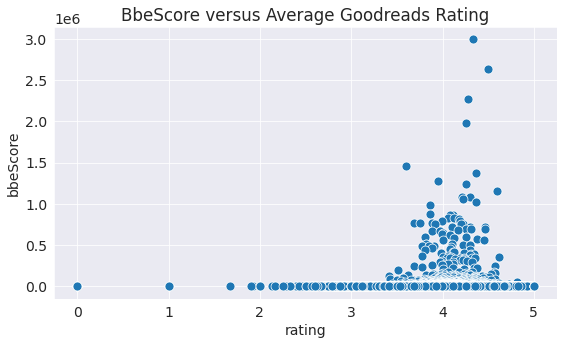

In [128]:
# Create a scatter plot
sns.scatterplot(x=df.rating, # X-axis
                y=df.bbeScore,  # Y-axis
                # Dot color
                s=80);

# Chart title
plt.title("BbeScore versus Average Goodreads Rating");

It is interesting to see that the book with the highest bbeScore does not have the highest rating on Goodreads. But, as we saw before, this could in theory be due to some books with high average ratings that have received only few ratings. Let's check whether the above result holds when we restrict our analysis to books that received at least 10,000 ratings:

In [129]:
# create a dataframe with books that have received at least 10,000 ratings
df_high_no_ratings = df[df.numRatings > 10e+03]

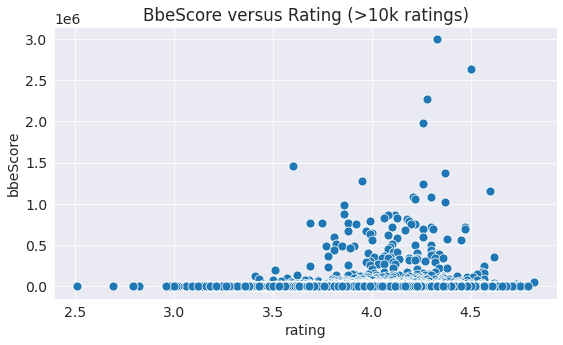

In [130]:
# Create a scatter plot
sns.scatterplot(x=df_high_no_ratings.rating, # X-axis
                y=df_high_no_ratings.bbeScore,  # Y-axis
                # Dot color
                s=80);

# Chart title
plt.title("BbeScore versus Rating (>10k ratings)");

The scatter plot points out that by restricting our analysis to books with >10,000 ratings, books with an average rating of 5 are not a part of the list anymore. Nevertheless, visually, no apparent correlation can be observed. Let's verify this by calculating the correlation coefficient:

In [131]:
df_high_no_ratings.rating.corr(df_high_no_ratings.bbeScore)

0.04548142624405191

From above it follows that the Goodsread Rating is not an indicator for the bbeScore, also not when only takings books into account that received at least 10,000 ratings. Possibly, using the Goodreads rating, people can either up or down vote a book, whereas the Best Books Ever list only allows for positive votes.

### Q5: How does the number of Goodreads ratings influence the bbeScore?

An interesting, and perhaps not directly obvious, observation by answering Question 1 was the high correlation (0.71) between `numRatings` and `bbeScore` (0.71). Since `bbeScore` and `bbeVotes` are nearly perfectly correlated, a high correlation (0.72) between `numRatings` and `bbeVotes` was observed as well. Here we will explore this relationship further.

First let's create a scatter plot:

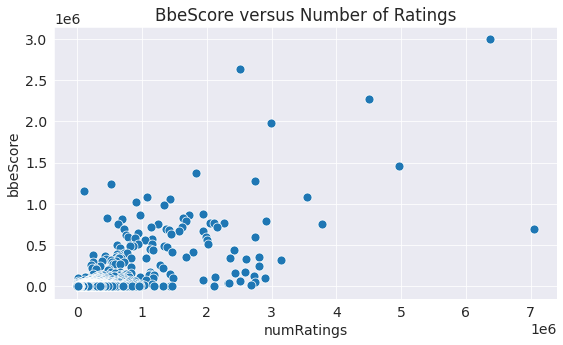

In [132]:
# Create a scatter plot
sns.scatterplot(x=df.numRatings, # X-axis
                y=df.bbeScore,  # Y-axis
                # Dot color
                s=80);

# Chart title
plt.title("BbeScore versus Number of Ratings");

From the scatterplot the positive correlation can visually be observed. Nevertheless, it seems that some books have a high number of ratings, but do not score very high on the list. Let's check out the top-10 of books by the number of ratings:

In [133]:
df.sort_values(by='numRatings', ascending=False).head(10)

title  \
32   Harry Potter and the Sorcerer's Stone   
0                         The Hunger Games   
4                                 Twilight   
2                    To Kill a Mockingbird   
27                        The Great Gatsby   
10                  The Fault in Our Stars   
80                                    1984   
3                      Pride and Prejudice   
21                               Divergent   
147    The Hobbit, or There and Back Again   

                                            author  bbeScore  bbeVotes  \
32       J.K. Rowling, Mary GrandPré (Illustrator)    691430      7348   
0                                  Suzanne Collins   2993816     30516   
4                                  Stephenie Meyer   1459448     14874   
2                                       Harper Lee   2269402     23328   
27   F. Scott Fitzgerald, Francis Scott Fitzgerald    755074      8142   
10                   John Green (Goodreads Author)   1087056     11287   
80                                   George Orwell    324371      3544   
3        Jane Austen, Anna Quindlen (Introduction)   1983116     20452   
21                Veronica Roth (Goodreads Author)    793269      8339   
147                                 J.R.R. Tolkien    107478      1284   

              isbn                 series language  pages  rating  numRatings  \
32   9999999999999        Harry Potter #1  English  309.0    4.47     7048471   
0    9780439023481    The Hunger Games #1  English  374.0    4.33     6376780   
4    9780316015844   The Twilight Saga #1  English  501.0    3.60     4964519   
2    9999999999999  To Kill a Mockingbird  English  324.0    4.28     4501075   
27   9999999999999                    NaN  English  200.0    3.92     3775504   
10   9999999999999                    NaN  English  313.0    4.21     3550714   
80      B003JTHWKU                    NaN  English  237.0    4.19     3140442   
3    9999999999999                    NaN  English  279.0    4.26     2998241   
21   9780062024039           Divergent #1  English  487.0    4.19     2906258   
147  9780618260300             The Hobbit  English  366.0    4.27     2896265   

     likedPercent  
32           96.0  
0            96.0  
4            78.0  
2            95.0  
27           90.0  
10           93.0  
80           94.0  
3            94.0  
21           94.0  
147          95.0

Interestingly, the book *Harry Potter and the Sorcerer's Stone* has received more ratings on the Goodreads platform (approx. 705 million) and a higher average rating (4.47) than *The Hunger Games*, the top-book from the Best Books Ever list (approx. 638 million ratings with an average rating of 4.33). However, *Harry Potter and the Sorcerer's Stone* only received ~7,300 votes on the Best Books Ever list, versus >30,000 votes for the *The Hunger Games*. This underscores how different ways of scoring books can lead to different outcomes on what is the best book.

All in all, we can conclude that the number of ratings is positively correlated with the bbeScore and hence the position of the book on the list. However, this relationship is not absolute and some books, most notably *Harry Potter and the Sorcerer's Stone*, score low on the Best Books Ever list despite a high number of Goodreads ratings and a high average Goodreads rating.

### Q6: What is the percentage of the books in the list that have accumulated 80% of the votes?

Our exploratory analysis of the columns showed that the number of votes, and hence the resulting score, is heavily skewed. This is a common phenomenon called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). In short, oftentimes 80% of the consequences (or output) can be ascribed to 20% of the causes (or input). It is also known as the "80/20-rule", although other distributions, sometimes even more skewed; such as 95/10, are possible as well.

It will be interesting to quantify this for the number of votes casted on the list; in other words: What is the percentage of the books in the list that have accumulated 80% of the votes?

First we recapitulate the total number of of casted votes:

In [134]:
print("In total there have been {:.1f} million votes casted on the list.".format(total_votes / 1e6))

In total there have been 1.2 million votes casted on the list.


Now we take a few steps to create additional columns in the dataframe that will help us answer the question:

In [135]:
# add a new column expressing the percentage of votes per book: shareVotes(%)
df['shareVotes (%)'] = 100 * df.bbeVotes / total_votes

In [136]:
# verify that the column has been added
df.head()

title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author  bbeScore  bbeVotes  \
0                            Suzanne Collins   2993816     30516   
1  J.K. Rowling, Mary GrandPré (Illustrator)   2632233     26923   
2                                 Harper Lee   2269402     23328   
3  Jane Austen, Anna Quindlen (Introduction)   1983116     20452   
4                            Stephenie Meyer   1459448     14874   

            isbn                 series language  pages  rating  numRatings  \
0  9780439023481    The Hunger Games #1  English  374.0    4.33     6376780   
1  9780439358071        Harry Potter #5  English  870.0    4.50     2507623   
2  9999999999999  To Kill a Mockingbird  English  324.0    4.28     4501075   
3  9999999999999                    NaN  English  279.0    4.26     2998241   
4  9780316015844   The Twilight Saga #1  English  501.0    3.60     4964519   

   likedPercent  shareVotes (%)  
0          96.0        2.581095  
1          98.0        2.277193  
2          95.0        1.973122  
3          94.0        1.729865  
4          78.0        1.258068

In [137]:
# add a column with cumulative sum of votes percentage: Cumsum shareVotes(%)
df['Cumsum shareVotes (%)'] = df['shareVotes (%)'].cumsum()

In [138]:
# verify that the column has been added
df.head(5)

title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author  bbeScore  bbeVotes  \
0                            Suzanne Collins   2993816     30516   
1  J.K. Rowling, Mary GrandPré (Illustrator)   2632233     26923   
2                                 Harper Lee   2269402     23328   
3  Jane Austen, Anna Quindlen (Introduction)   1983116     20452   
4                            Stephenie Meyer   1459448     14874   

            isbn                 series language  pages  rating  numRatings  \
0  9780439023481    The Hunger Games #1  English  374.0    4.33     6376780   
1  9780439358071        Harry Potter #5  English  870.0    4.50     2507623   
2  9999999999999  To Kill a Mockingbird  English  324.0    4.28     4501075   
3  9999999999999                    NaN  English  279.0    4.26     2998241   
4  9780316015844   The Twilight Saga #1  English  501.0    3.60     4964519   

   likedPercent  shareVotes (%)  Cumsum shareVotes (%)  
0          96.0        2.581095               2.581095  
1          98.0        2.277193               4.858288  
2          95.0        1.973122               6.831409  
3          94.0        1.729865               8.561274  
4          78.0        1.258068               9.819342

Now we can take advantage of the column to calculate the number of books that cumulatively have gathered 80% of the votes:

In [139]:
# Number of books responsible for 80% of the votes
df_80 = df[df['Cumsum shareVotes (%)'] <= 80]
len(df_80)

480

And now we can calculate to which percentage of the total number of books in the list this corresponds:

In [140]:
100 * (len(df_80) / len(df))

0.9167478370480721

0.9% of the books in the list have accumulated 80% of the Votes

Let's visualize this using a so-called ['Pareto chart'](https://en.wikipedia.org/wiki/Pareto_chart):

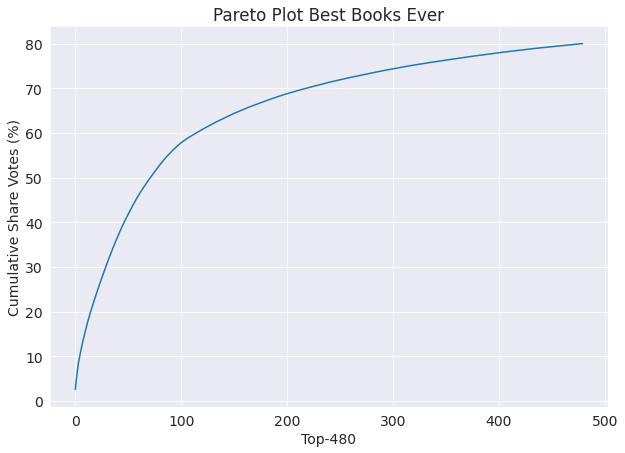

In [141]:
# set the 'darkgrid' style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))

# plot the data
sns.lineplot(data=df_80['Cumsum shareVotes (%)'])

#styling
plt.xlabel('Top-480')
plt.ylabel('Cumulative Share Votes (%)')
plt.title('Pareto Plot Best Books Ever');

### Q7: Do larger books score better?

Books range in size, as we saw before. Let's check whether thick books score better than thinner books.

Let's plot the bbeScore agains the number of pages of the book:

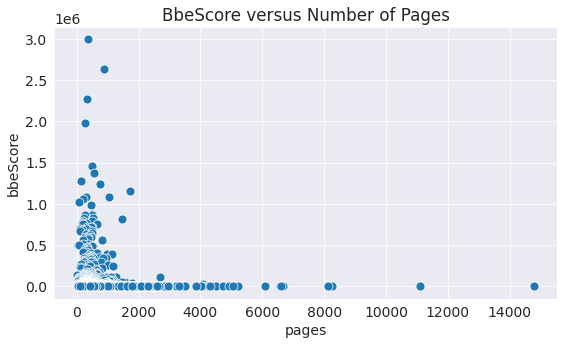

In [142]:
# Create a scatter plot
sns.scatterplot(x=df.pages, # X-axis
                y=df.bbeScore,  # Y-axis
                # Dot color
                s=80);

# Chart title
plt.title("BbeScore versus Number of Pages");

From the plot and the correlation calculated under Question 1, there is no clear relationship between the number of pages and the bbeScore. Eye-balling over the plot, though, suggests that very thick books (>2000 pages) tend to have low scores, whereas the picture for thick books (1000-2000 pages) is less clear.

Let's compare the number of books and thick books that make it to the top-300. Note that here we use the dataframe `df_high_votes` that we created before. We will define 'very thick books' as books having more than 2000 pages:

In [143]:
# number of very thick books in top-300
vtb_300 = len(df_high_votes[df_high_votes.pages > 2000])
vtb_300

1

We see that only one book with over 2000 pages made it to the top-300:

In [144]:
df_high_votes[df_high_votes.pages > 2000]

title  \
143  The Little House Collection   

                                                author  bbeScore  bbeVotes  \
143  Laura Ingalls Wilder, Garth Williams (Illustra...    115088      1361   

              isbn             series language   pages  rating  numRatings  \
143  9780060529963  Little House #1-9  English  2700.0    4.34      141514   

     likedPercent  
143          96.0

Similarly we can determine the number of 'very thick books' in the entire list:

In [145]:
# number of very thick books in entire list
vtb_list = len(df[df.pages>2000])
vtb_list

118

Now we can calculate percentages of very thick books in both the entire list and the top-300:

In [146]:
perc_vtb_list = 100 * vtb_list / len(df)
perc_vtb_list

0.22536717660765102

In [147]:
perc_vtb_300 = 100 * vtb_300 / len(df_high_votes)
perc_vtb_300

0.3333333333333333

The same steps are now applied to 'thick books', which I define as having between 1000 and 2000 pages:

In [148]:
# number of thick books in top-300
tb_300 = len(df_high_votes[(df_high_votes.pages > 1000) & (df_high_votes.pages < 2000)])
tb_300

17

In [149]:
df_high_votes[(df_high_votes.pages > 1000) & (df_high_votes.pages < 2000)].head(1)

title          author  \
8  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...  J.R.R. Tolkien   

   bbeScore  bbeVotes           isbn                      series language  \
8   1159802     12111  9780345538376  The Lord of the Rings #0-3  English   

    pages  rating  numRatings  likedPercent  
8  1728.0     4.6      110146          98.0

In [150]:
# number of thick books in entire list
tb_list = len(df[(df.pages > 1000) & (df.pages < 2000)])
tb_list

530

In [151]:
perc_tb_list = 100 * tb_list / len(df)
perc_tb_list

1.0122424034072461

In [152]:
perc_tb_300 = 100 * tb_300 / len(df_high_votes)
perc_tb_300

5.666666666666667

Now let's recapitulate our findings:

In [153]:
print("The percentage of very thick books in the top-300 is {:.1f}%, whereas {:.1f}% of the entire list consists of very thick books.".format(perc_vtb_300, perc_vtb_list))

The percentage of very thick books in the top-300 is 0.3%, whereas 0.2% of the entire list consists of very thick books.


In [154]:
print("The percentage of thick books in the top-300 is {:.1f}%, whereas {:.0f}% of the entire list consists of thick books.".format(perc_tb_300, perc_tb_list))

The percentage of thick books in the top-300 is 5.7%, whereas 1% of the entire list consists of thick books.


Although there does not seem to be an overall correlation between page number and position on the list, an enrichment of thick (1000-2000 pages) books was found in the top-300: i.e. 17 books (5.7%) of the top-300 are thick books, as compared to 1% of the entire list consisting of thick books, of which *J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings* by J.R.R. Tolkien ranked the highest at position 9. Only one very thick book (>2000 pages) was found in the top-300: *The Little House Collection* from Laura Ingalls Wilder at position 144.

### Q8: What are the highest ranked non-English books?

We already saw that the vast majority of books on the list are written in English, and that also the top-25 is entirely in English. Nevertheless, it will be be interesting to see what are the highest ranked books languages other than English.

Let's check the top-10 of non-English books that are most highly ranked

In [155]:
# create a dataframe of non-English books
non_English_df = df[(df.language != 'English') & (df.language != 'Unknown')]

In [156]:
non_English_df.head(10)

title  \
181                                       Madame Bovary   
199                            Tote Mädchen lügen nicht   
309                                  زندگی مه آلود پریا   
354                                       القرآن الكريم   
369                                         انتحار فاشل   
378                                              العصبي   
494    Demian: Die Geschichte von Emil Sinclairs Jugend   
728                                            Rubinrot   
782                                     گم شده ای در مه   
1015  Maus: Un survivant raconte, tome 1: Mon père s...   

                                                 author  bbeScore  bbeVotes  \
181   Gustave Flaubert, Mark Overstall (Contributor)...     80572      1009   
199   Jay Asher (Goodreads Author), Knut Krüger (Übe...     71281       817   
309                 سید مرتضی مصطفوی (Goodreads Author)     39342       396   
354                                           Anonymous     32967       372   
369                               أحمد جمال الدين رمضان     31144       319   
378                               أحمد جمال الدين رمضان     29689       305   
494           Hermann Hesse, Thomas Mann (Introduction)     18598       223   
728                                        Kerstin Gier     10166       120   
782                 سید مرتضی مصطفوی (Goodreads Author)      9249        94   
1015                                     Art Spiegelman      6136        88   

               isbn                 series language  pages  rating  \
181   9780192840394                    NaN   French  329.0    3.68   
199   9783570160206                    NaN   German  288.0    3.92   
309   9786007072714                    NaN  Persian  204.0    3.92   
354   9999999999999                    NaN   Arabic  604.0    4.35   
369   9789778100079                    NaN   Arabic  175.0    4.51   
378   9789778100082                    NaN   Arabic  165.0    4.52   
494   9783518367063                    NaN   German  194.0    4.13   
728   9783401063348  Edelstein-Trilogie #1   German  343.0    4.10   
782   9786008382348                    NaN  Persian   82.0    4.03   
1015  9782080660299                Maus #1   French  159.0    4.35   

      numRatings  likedPercent  shareVotes (%)  Cumsum shareVotes (%)  
181       253769          87.0        0.085343              67.281688  
199       772610          89.0        0.069103              68.716701  
309          948          78.0        0.033494              74.750843  
354        57449          89.0        0.031464              76.441293  
369         2270          96.0        0.026982              76.955296  
378         1952          97.0        0.025797              77.254292  
494        73940          95.0        0.018862              80.330021  
728       111928          94.0        0.010150              83.883551  
782          888          77.0        0.007951              84.469195  
1015      251316          95.0        0.007443              86.463969

It was found that from the non-English books, *Madame Bovary* (French) was most highly ranked at spot 182, followed by *Tote Mädchen lügen nicht* (German) at position 199, and the Persian book *Foggy life of fairies* at position 309. In general, we observe that only 9 non-English books make it to the top-100

Let's visualize the top-25 in a bar chart:

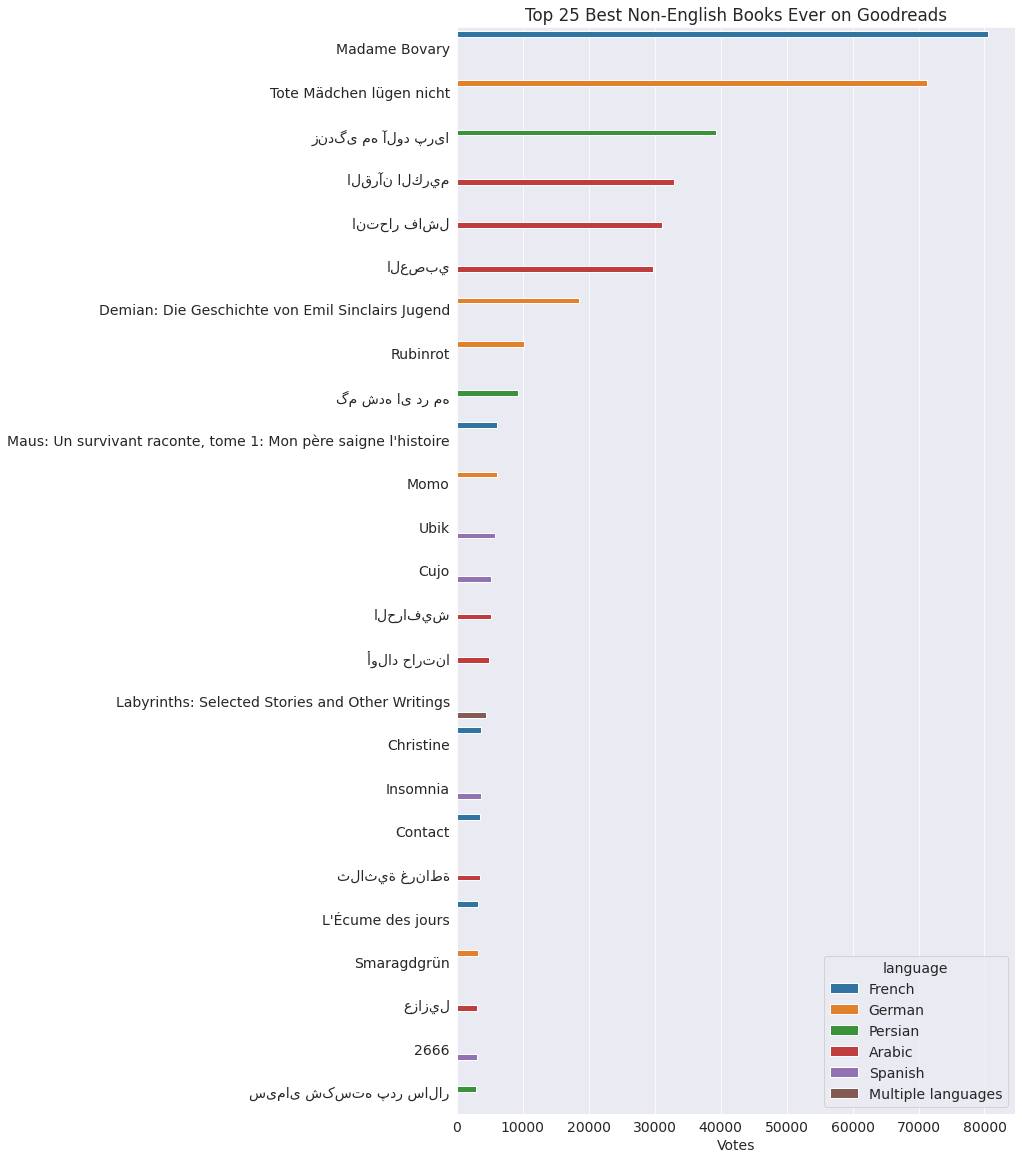

In [157]:
plt.figure(figsize=(10,20))
plt.title('Top 25 Best Non-English Books Ever on Goodreads')
sns.barplot(x="bbeScore", y="title", data=non_English_df.head(25), hue='language')
plt.xlabel('Votes');
plt.ylabel('');

## 5. Inferences and Conclusion

There are many different opinions on the best book(s) ever. On the website Goodreads, a platform for book worms, there is a list entitled 'Best Books Ever' that tries to answer this question. The goal of this EDA was to pinpoint how this list is built up and determine the characteristics of books that have made it to the list. 

Hereby I list the major inferences that can be made from the analyses:

**About the position on the list**
- the number of 'bbe votes' is the major determinant of the 'bbeScore' and as such the position of a book on the list. Nevertheless, this relationship is not absolute, since in some cases a book with less votes surpasses a book with more votes on the list.
- In total nearly 1.2 million votes have been casted on the list, with 0.9% of the books in the list accumulating 80% of the votes. The number of votes is heavily skewed to the left: 75% of the books in the list have received two votes or less, whereas 907 books have received at least 100 votes.
- *The Hunger Games* by Suzanne Collins is with >30 000 votes the highest ranked book on the list, followed by *Harry Potter and the Order of the Phoenix* by J.K. Rowling (~ 27,000 votes) and *To Kill a Mockingbird* by Harper Lee (~23,000 votes).
- The books in the list have received a total of 937 million ratings on the Goodreads platform, and have an average and median of 4 stars.
- the Goodsread Rating is not an indicator or predictor of the bbeScore, also not when only takings books into account that received at least 10,000 ratings. Possible explanations are that using the Goodreads rating, people can either up or down vote a book, whereas the Best Books Ever list only allows for positive votes.
- the number of Goodreads ratings is positively correlated with the bbeScore and hence the position of the book on the list. However, some books, most notably *Harry Potter and the Sorcerer's Stone* score relatively low on the Best Books Ever list despite a high number of Goodreads ratings and a high average Goodreads rating. This underscores how different ways of scoring books can lead to different outcomes on what the best book is.


**General Findings**
- The vast majority of books in the list (>80%) are published in English. Arabic comes in second (2.0%) followed by Spanish (1.3%) on the third place.
- From the non-English books, *Madame Bovary* (French) by Gustave Flaubert was most highly ranked at spot 182, followed by *Tote Mädchen lügen nicht* by Jay Asher at position 199, and the Persian book *Foggy life of fairies* at position 309.
- The average book in the list has 332 pages and the median book has 304 pages. Notably, 650 books in the list have over 1000 pages.
- Although there does not seem to be an overall correlation between page number and position in the list, an enrichment of thick (1000-2000 pages) books was found in the top-300: i.e. 17 books (5.7%) of the top-300 are thick books, as compared to 1% of the entire list consisting of thick books, of which *J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings* (1728 pages) by J.R.R. Tolkien ranked the highest at position 9.

**Concluding Remarks**

All in all, the major take-away from this analysis is that, like observed for many phenomena, the distribution of votes (the major determinant of the position on the list) is heavily skewed, a phenomenon termed the Pareto distribution. Less than 1% of all the books on the list have accumulated 80% of the votes. Although it is generally known that some books indeed score very well, and some books go unnoticed, it is probably the nature of the books list on the Goodreads site that plays a role as well. If you'd like to vote on a book on the list, you would likely start by viewing the top of the list, and the chance that you vote on a book that is *already* high on the list is smaller than that you vote on a book that is lower on the list. In that way, success of top books are further amplified. For that reason, just like in official political elections, competitions are ideally run double-blind; that is you vote on your favorite books without knowing what other people vote nor how many votes have been casted already on certain books/ candidates/ etc. 

## 6. Future Work and References

In this analysis certain columns were excluded. For follow up research, it would be interesting to add more columns (re-scrape the data first if needed) to answer questions such as:
- Which years/periods see the most books from the list? What is the best book per year?
- How many books belong do a series? Does this influence the position in the list?
- How many authors have won one or several Pulitzer prices?
- Compare this list to other lists available on the internet that deal with best books: which books are scoring high in general? Can a general list of the best books ever be created?

### References

- [Source dataset](https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021)
- [Kaggle](https://www.kaggle.com/)
- [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
- [Opendatasets](https://github.com/JovianML/opendatasets) library
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [Plotly](https://plotly.com/)

### --SAVING NOTEBOOK--

In [158]:
jovian.commit(project='snoek-best-books')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "snoektim/snoek-best-books" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/snoektim/snoek-best-books


'https://jovian.ai/snoektim/snoek-best-books'